<a href="https://colab.research.google.com/github/Ayushx29/DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction/blob/main/DeepCSAT_E_Commerce_Customer_Satisfaction_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - DeepCSAT: E-Commerce Customer Satisfaction Score Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member  -** Ayush Bhagat


# **Project Summary -**

This project aims to predict Customer Satisfaction (CSAT) scores using a deep learning-based regression model in the context of e-commerce. Understanding and improving customer satisfaction is critical for driving loyalty, retention, and long-term business growth. Traditionally, CSAT is measured through direct surveys, which can be delayed and limited in scope. This project addresses that limitation by using historical interaction data to predict CSAT scores more accurately and in real time.

The dataset used in this project comes from the e-commerce platform “Shopzilla” and spans one month of customer service interactions. It includes a variety of features such as communication channel, interaction category and sub-category, customer feedback (remarks), timestamps for orders and issue resolutions, product information, agent details (name, shift, tenure), and the target variable—CSAT Score. These features reflect both operational performance and customer experience dimensions.

The project follows a structured pipeline, starting with data cleaning and integrity checks. Missing values were handled, and timestamps were parsed to derive useful features like response time. Feature engineering was performed to extract relevant information from textual and categorical fields, and appropriate preprocessing techniques such as normalization and encoding were applied to prepare the data for modeling.

A deep learning model was then developed using an Artificial Neural Network (ANN). The architecture included multiple dense layers with ReLU activation and dropout for regularization, and a final linear layer for regression output. The model was trained using the Adam optimizer and evaluated using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), showing reliable performance in predicting CSAT scores.

The model also revealed key insights into customer satisfaction drivers, such as handling time, product category, agent shift, and customer feedback sentiment. These insights can help businesses refine their support operations, agent performance management, and service offerings.

While the deployment phase is planned for the video presentation, the model is designed for easy integration into local systems to support real-time CSAT monitoring and proactive service improvements.

In conclusion, this project successfully demonstrates the use of deep learning for predicting customer satisfaction in e-commerce, offering a scalable and data-driven approach to improving customer service quality.

# **GitHub Link -**

https://github.com/Ayushx29/DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction

# **Problem Statement**


**The objective of this project is to design and implement a deep learning model capable of accurately predicting Customer Satisfaction (CSAT) scores based on historical interaction data and customer feedback. The solution aims to equip e-commerce businesses with a scalable, data-driven tool for real-time satisfaction monitoring, enabling continuous service optimization and enhanced customer experience.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and ANN building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
dataset=pd.read_csv("/content/drive/MyDrive/AlmaBetter Masters Projects/DeepCSAT E-Commerce Customer Satisfaction Score Prediction/eCommerce_Customer_support_data.csv")

### Dataset First View

In [4]:
# Dataset First Look
dataset.head(10)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
5,1cfde5b9-6112-44fc-8f3b-892196137a62,Email,Returns,Fraudulent User,NaN,a2938961-2833-45f1-83d6-678d9555c603,NaN,01/08/2023 15:13,01/08/2023 18:39,01-Aug-23,NaN,NaN,NaN,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,5
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,Outcall,Product Queries,Product Specific Information,NaN,bfcb562b-9a2f-4cca-aa79-fd4e2952f901,NaN,01/08/2023 15:31,01/08/2023 23:52,01-Aug-23,NaN,NaN,NaN,NaN,Shannon Hicks,Aiden Patel,Olivia Tan,>90,Morning,5
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,Inbound,Shopzilla Related,General Enquiry,NaN,c7caa804-2525-499e-b202-4c781cb68974,NaN,01/08/2023 23:31,01/08/2023 23:36,01-Aug-23,NaN,NaN,NaN,NaN,Tabitha Ayala,Amelia Tanaka,Michael Lee,31-60,Evening,5


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(85907, 20)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


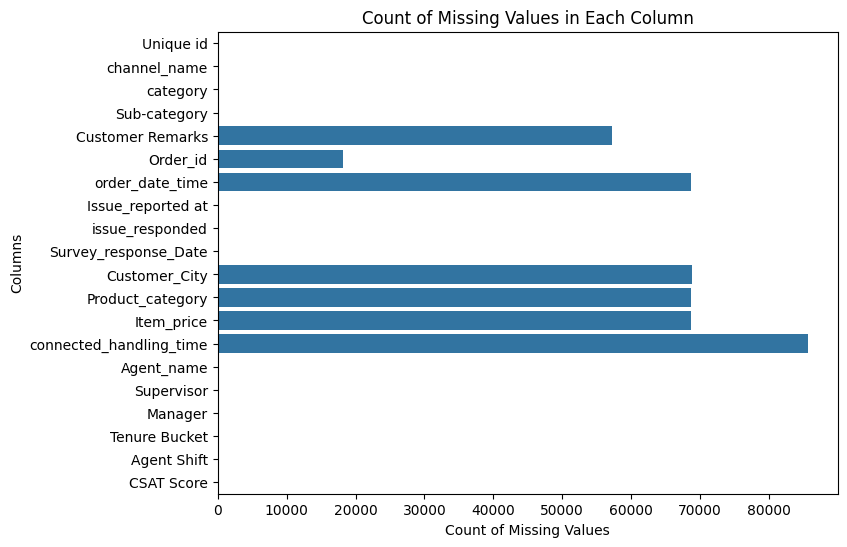

In [9]:
# Visualizing the missing values

missing_values = dataset.isnull().sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=missing_values, y=missing_values.index, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.title('Count of Missing Values in Each Column')
plt.show()

### What did you know about your dataset?

The provided dataset originates from the e-commerce industry and is centered around analyzing Customer Satisfaction Scores (CSAT) to uncover the underlying factors influencing customer sentiment.

Customer Satisfaction Score (CSAT) is a critical Key Performance Indicator (KPI) used to measure how satisfied customers are with a company’s products, services, and overall experience. In an e-commerce context, CSAT reflects customer perceptions across multiple touchpoints, including product quality, website usability, delivery efficiency, and customer support responsiveness.

As a direct representation of customer experience, CSAT is essential for e-commerce businesses it drives customer retention, repeat purchases, and brand reputation, ultimately impacting both short-term performance and long-term growth.

The dataset consists of 85,907 rows and 20 columns. While it contains no duplicate entries, several fields do exhibit missing values, specifically in columns such as Customer_city, Product_category, Item_price, Order_id, Order_date_time, Customer_remarks, and Connected_handling_time. Addressing these gaps is crucial for maintaining data integrity and ensuring accurate model predictions.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,07c7a878-0d5a-42e0-97ef-de59abec0238,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,3230db30-f8da-4c44-8636-ec76d1d3d4f3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,13/08/2023 10:40,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

**Unique id:** Unique identifier for each record (integer).

**Channel name:** Name of the customer service channel (object/string).

**Category:** Category of the interaction (object/string).

**Sub-category:** Sub-category of the interaction (object/string).

**Customer Remarks:** Feedback provided by the customer (object/string).

**Order id:** Identifier for the order associated with the interaction (integer).

**Order date time:** Date and time of the order (datetime).

**Issue reported at:** Timestamp when the issue was reported (datetime).

**Issue responded:** Timestamp when the issue was responded to (datetime).

**Survey response date:** Date of the customer survey response (datetime).

**Customer city:** City of the customer (object/string).

**Product category:** Category of the product (object/string).

**Item price:** Price of the item (float).

**Connected handling time:** Time taken to handle the interaction (float).

**Agent name:** Name of the customer service agent (object/string).

**Supervisor:** Name of the supervisor (object/string).

**Manager:** Name of the manager (object/string).

**Tenure Bucket:** Bucket categorizing agent tenure (object/string).

**Agent Shift:** Shift timing of the agent (object/string).

**CSAT Score:** Customer Satisfaction (CSAT) score (integer).

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in",i,"is", dataset[i].nunique(),'.')

No. of unique values in Unique id is 85907 .
No. of unique values in channel_name is 3 .
No. of unique values in category is 12 .
No. of unique values in Sub-category is 57 .
No. of unique values in Customer Remarks is 18231 .
No. of unique values in Order_id is 67675 .
No. of unique values in order_date_time is 13766 .
No. of unique values in Issue_reported at is 30923 .
No. of unique values in issue_responded is 30262 .
No. of unique values in Survey_response_Date is 31 .
No. of unique values in Customer_City is 1782 .
No. of unique values in Product_category is 9 .
No. of unique values in Item_price is 2789 .
No. of unique values in connected_handling_time is 211 .
No. of unique values in Agent_name is 1371 .
No. of unique values in Supervisor is 40 .
No. of unique values in Manager is 6 .
No. of unique values in Tenure Bucket is 5 .
No. of unique values in Agent Shift is 5 .
No. of unique values in CSAT Score is 5 .


## 3. ***Data Wrangling & Exploratory Data Analysis (EDA).***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=dataset.copy()
# Checking Shape of True Value
print("No. of customers interaction and feedbacks with highest customer satisfaction scores  :",len(df[df['CSAT Score']==5]))
# Assigning  customers data to variable df_best_score
df_best_score=df[(df['CSAT Score']==5)]
df_least_score=df[(df['CSAT Score']==1)]

No. of customers interaction and feedbacks with highest customer satisfaction scores  : 59617


### 1. Top 3 best performing Managers

In [14]:
# Groupby Manager Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Manager').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Manager,
John Smith,17844
Michael Lee,12353
Jennifer Nguyen,10575


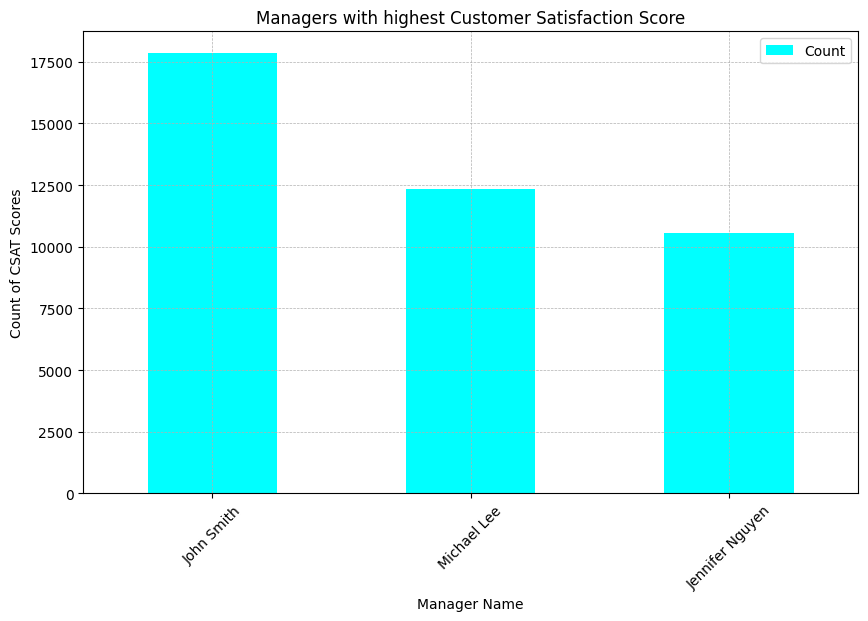

In [15]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax, colormap = 'cool')

# Adding labels and title
ax.set_xlabel('Manager Name')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Managers with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 2.  Top 3 best performing Agents

In [16]:
# Groupby Agent_name Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Agent_name').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Agent_name,
Wendy Taylor,299
David Smith,218
Timothy Huff,211


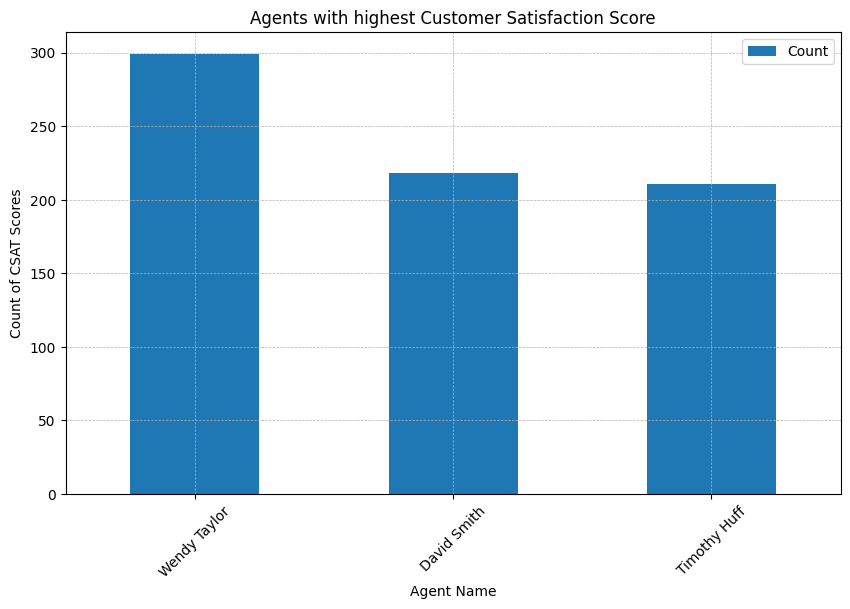

In [17]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Agent Name')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Agents with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 3. Top 3 best performing Supervisors

In [18]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Supervisor').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Supervisor,
Carter Park,2921
Elijah Yamaguchi,2870
Nathan Patel,2576


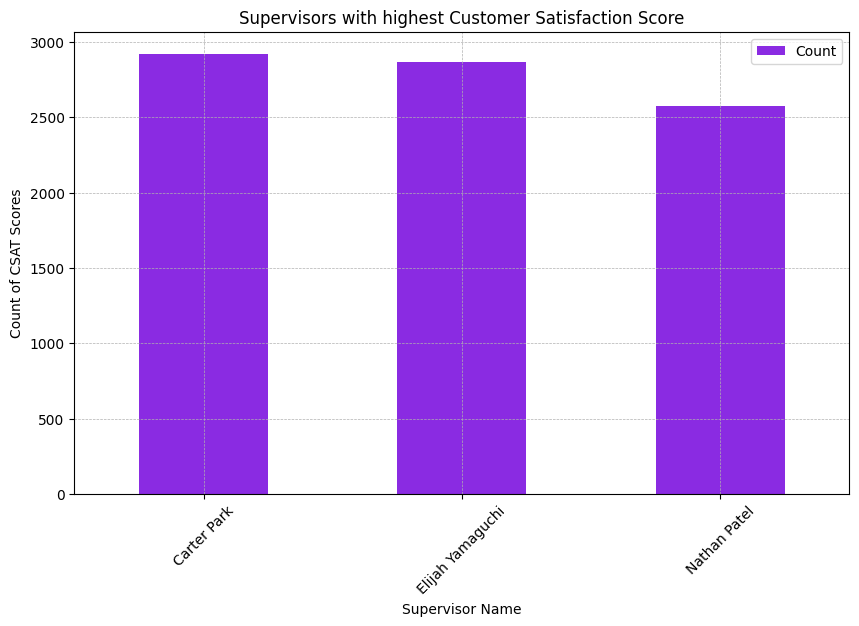

In [19]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax, color = '#8A2BE2')

# Adding labels and title
ax.set_xlabel('Supervisor Name')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Supervisors with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 4. Which tenure group of employees is performing the best?

In [20]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Tenure Bucket').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Tenure Bucket,
>90,21678
On Job Training,16860
31-60,8301


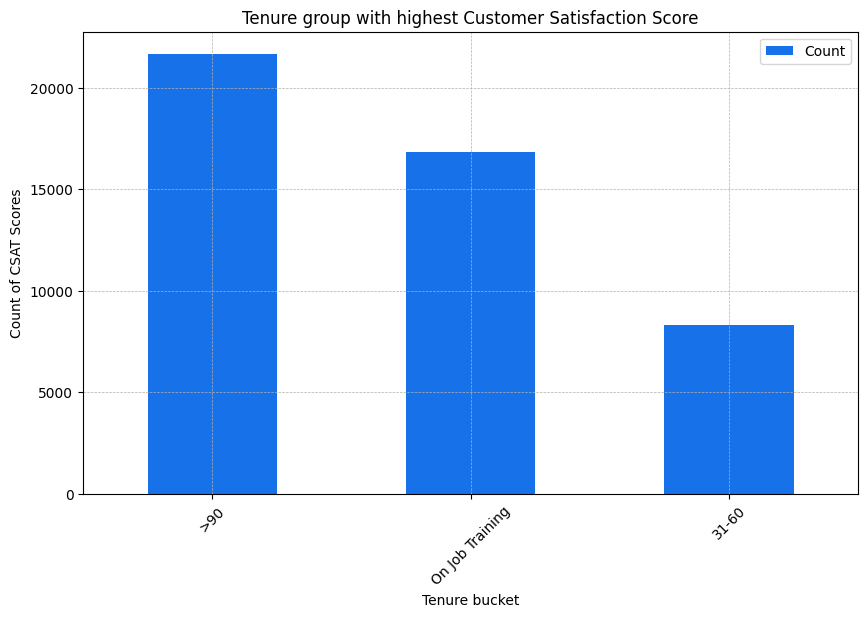

In [21]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax, color = '#1772E9')

# Adding labels and title
ax.set_xlabel('Tenure bucket')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Tenure group with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 5. Which shift timings of agents is performing the best?

In [22]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Agent Shift').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Agent Shift,
Morning,28087
Evening,23680
Afternoon,4153


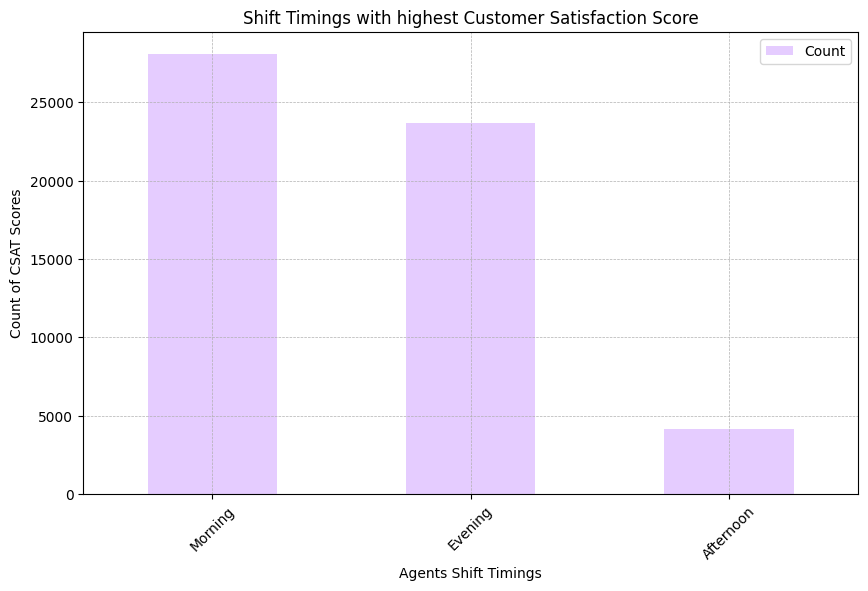

In [23]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax, color = '#E5CCFF')

# Adding labels and title
ax.set_xlabel('Agents Shift Timings')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Shift Timings with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 6. How response time impacts the customer satisfaction score?

In [24]:
# Ensure the 'Issue reported at' and 'Issue responded' columns are in datetime format
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True)

# Calculate the response time
df['Response_Time'] = df['issue_responded'] - df['Issue_reported at']

# Convert 'Response_Time' to a numerical format in seconds for aggregation
df['Response_Time_seconds'] = df['Response_Time'].dt.total_seconds()

# Groupby CSAT Score and calculate the mean response time
grouped_df = df.groupby('CSAT Score').agg(
    Mean_Response_Time=('Response_Time_seconds', 'mean')
).sort_values(by='Mean_Response_Time', ascending=False)

# Convert the mean response time back to timedelta for readability
grouped_df['Mean_Response_Time'] = pd.to_timedelta(grouped_df['Mean_Response_Time'], unit='s')

# Display the grouped DataFrame
print(grouped_df)

                  Mean_Response_Time
CSAT Score                          
1          0 days 05:50:03.275155833
2          0 days 04:35:34.840218239
3          0 days 03:19:04.222048475
4          0 days 01:55:28.943756128
5          0 days 01:35:06.442122213


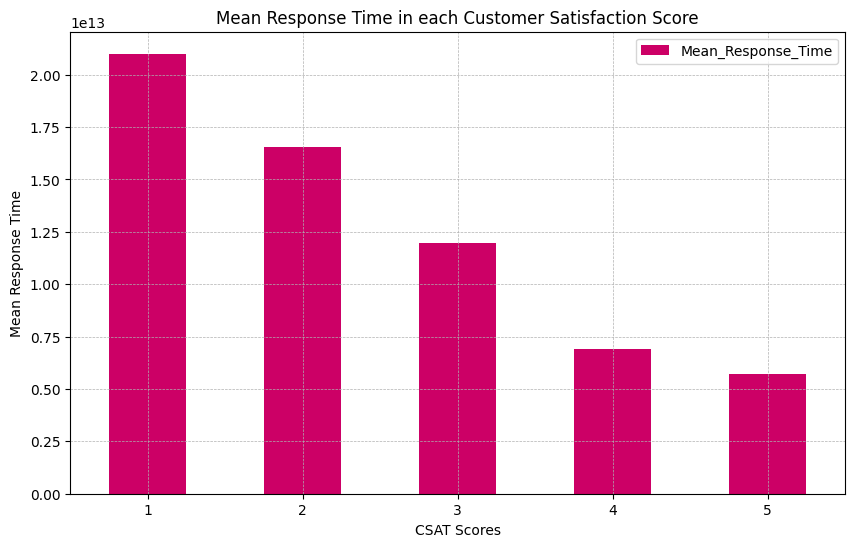

In [25]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind='bar', ax=ax, color = '#CC0066')

# Adding labels and title
ax.set_xlabel('CSAT Scores')
ax.set_ylabel('Mean Response Time')
ax.set_title('Mean Response Time in each Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=0.1)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 7. How customer handling time duration impacts the customer satisfaction score?

In [26]:
# Groupby Customer satisfaction score data w.r.t customer handling time
grouped_df = df.groupby('CSAT Score').agg(
    Mean_Response_Time=('connected_handling_time', 'mean')
).sort_values(by='Mean_Response_Time', ascending=False)

grouped_df

,Mean_Response_Time
CSAT Score,
3,488.000000
5,470.153005
1,452.187500
4,439.878788
2,296.000000


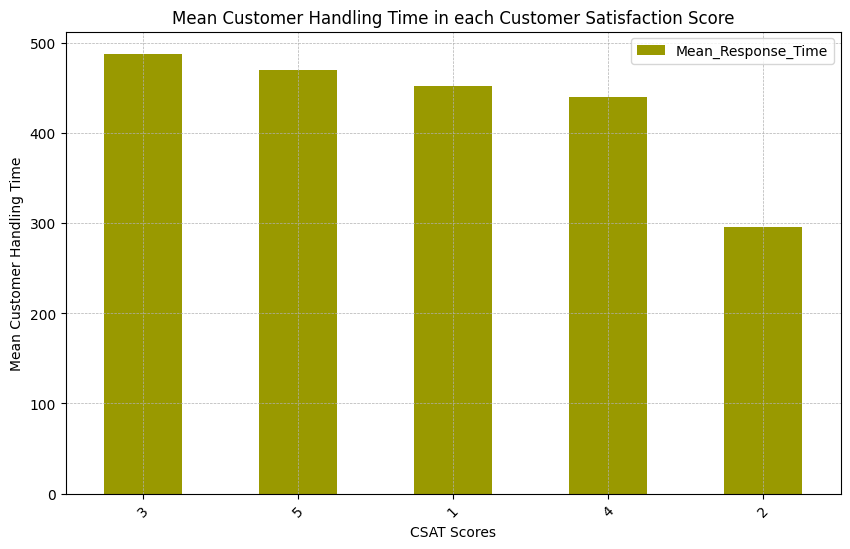

In [27]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind='bar', ax=ax, color = '#999900')

# Adding labels and title
ax.set_xlabel('CSAT Scores')
ax.set_ylabel('Mean Customer Handling Time')
ax.set_title('Mean Customer Handling Time in each Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 8. Top 5 Product Category with highest Customer Satisfaction Score

In [28]:
# Groupby Product_category Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Product_category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Product_category,
Electronics,3009
LifeStyle,2689
Books & General merchandise,2117
Mobile,982
Home,832


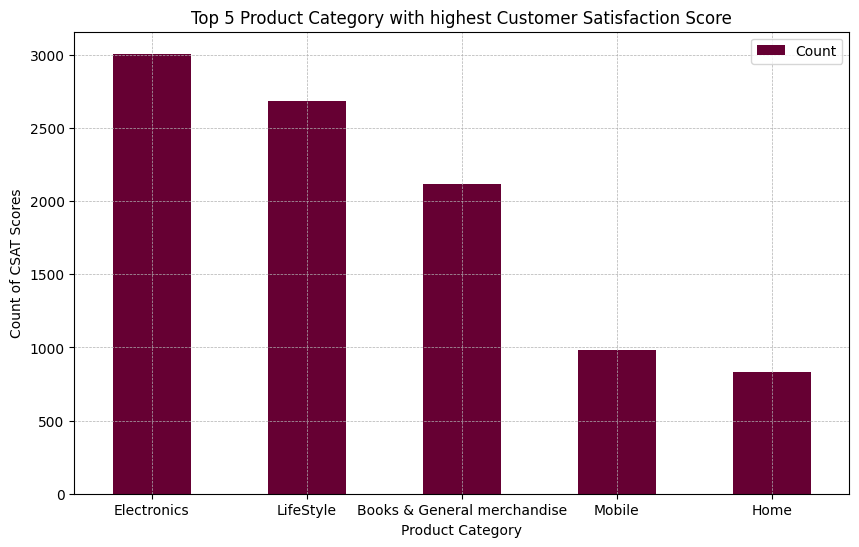

In [29]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax, color = '#660033')

# Adding labels and title
ax.set_xlabel('Product Category')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Product Category with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=0)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 9. Top 5 Category with highest customer satisfaction score

In [30]:
# Groupby Customer_City Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
category,
Returns,31977
Order Related,15090
Refund Related,3137
Product Queries,2257
Shopzilla Related,2009


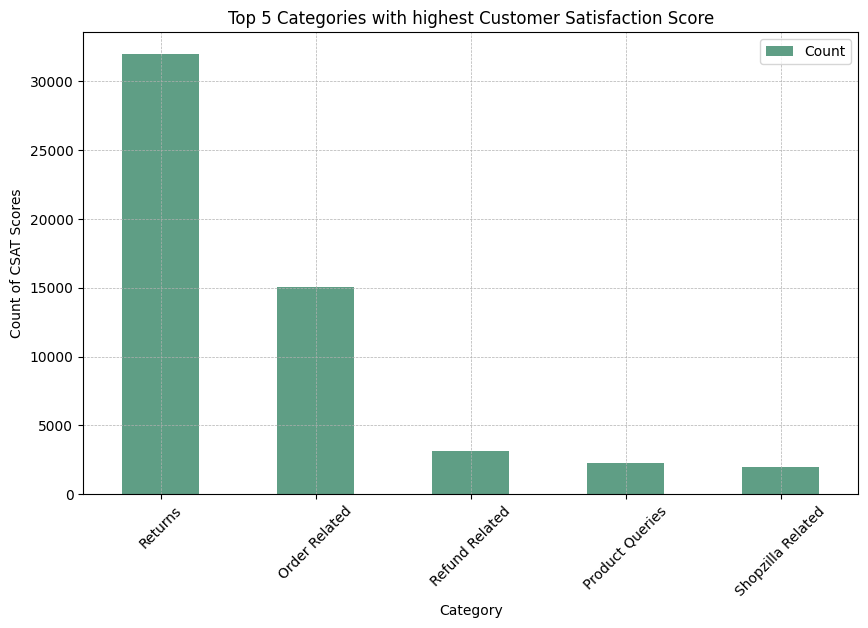

In [31]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax, color = '#5F9E85')

# Adding labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Categories with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 10. Top 5 Sub Category with highest Customer Satisfaction Score

In [32]:
# Groupby Sub-category Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Sub-category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Sub-category,
Reverse Pickup Enquiry,15233
Return request,6718
Order status enquiry,4764
Delayed,4604
Fraudulent User,3279


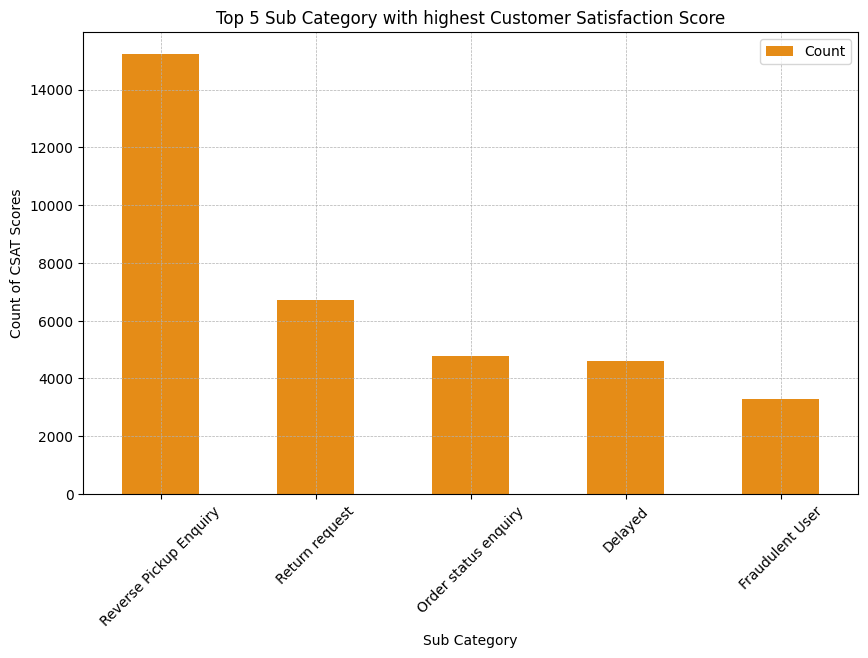

In [33]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax, color = '#E58C17')

# Adding labels and title
ax.set_xlabel('Sub Category')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Sub Category with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 11. Top 5 cities with highest customer satisfaction score

In [34]:
# Groupby Customer_City Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Customer_City').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Customer_City,
NEW DELHI,425
HYDERABAD,415
PUNE,226
MUMBAI,214
BANGALORE,201


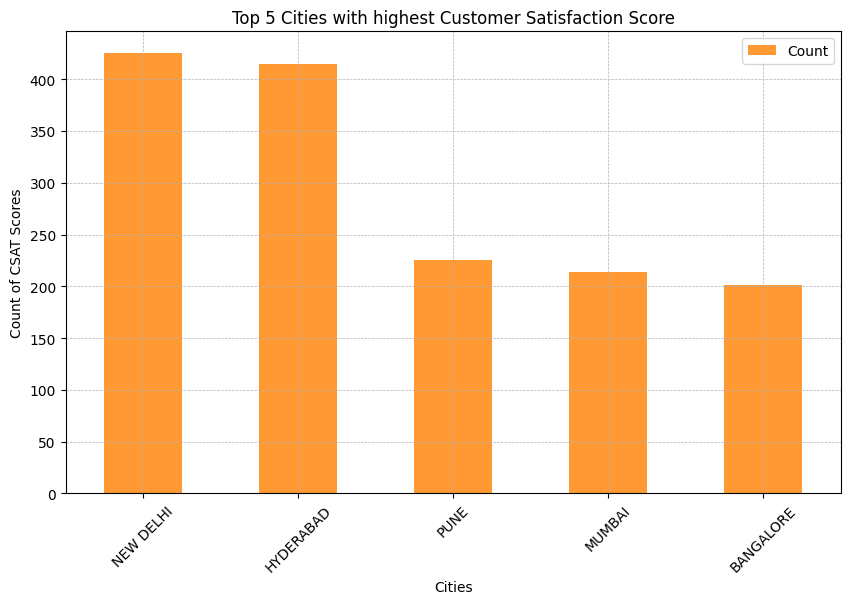

In [35]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax, color = '#FF9933')

# Adding labels and title
ax.set_xlabel('Cities')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Cities with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### 12.  Best performing Channels

In [36]:
# Groupby Channel name Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('channel_name').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df

,Count
channel_name,
Inbound,47419
Outcall,10365
Email,1833


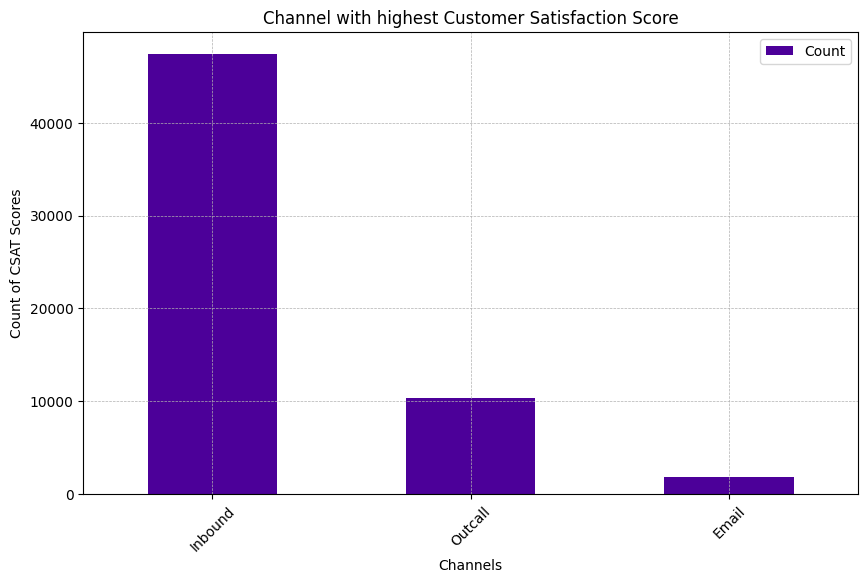

In [37]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax, color = '#4C0099')

# Adding labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Channel with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### What all manipulations have you done and insights you found?

Based on the provided dataset, the primary objective was to gain a comprehensive understanding of customer satisfaction scores through visual and analytical exploration. While graphical representations offered a high-level overview, a deeper investigation into the behavior of customers across different satisfaction levels was essential to uncover meaningful insights. Particular emphasis was placed on analyzing the characteristics and interaction patterns of customers with high CSAT scores to identify contributing factors behind their positive experiences.

Simultaneously, attention was directed toward understanding the underlying causes of lower satisfaction scores by examining relevant variables and trends within the dataset. The following insights were derived from the analysis:

**Key Insights from the Analysis**

* Response Time:

    A clear inverse relationship was observed between response time and CSAT scores. Longer response durations were often associated with lower satisfaction levels, emphasizing the importance of timely support in enhancing customer experience.

* Product Category:

    Certain product categories consistently recorded lower satisfaction scores. This indicates potential issues related to product quality, post-purchase support, or customer expectations, warranting targeted improvements in those areas.

* Customer Service Channel:

    Variations in CSAT scores across service channels highlighted that some channels (e.g., live chat or voice support) were more effective in resolving customer concerns. This suggests the need to assess and standardize service quality across all communication channels.

* Agent Tenure:

    Agents with longer tenure tended to receive higher CSAT scores, suggesting that experience significantly contributes to improved issue resolution and customer handling.

* Shift Timings:

    Discrepancies in CSAT scores were noted across different agent shifts. Some shifts, particularly off-peak or late-night hours, exhibited lower satisfaction levels, possibly due to limited staffing or support resources during those times.

* Customer Feedback (Remarks):

    A qualitative analysis of customer remarks revealed recurring themes and keywords linked to dissatisfaction, such as delays, miscommunication, or product mismatch. These textual insights provide valuable context to support data-driven service enhancements.


This analytical approach not only uncovers patterns linked to high and low customer satisfaction but also lays the groundwork for actionable strategies to improve service quality, optimize staffing, and tailor support mechanisms based on customer expectations and behavior.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Pie Chart on Dependant Variable i.e., CSAT Score (Univariate)

CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64
 


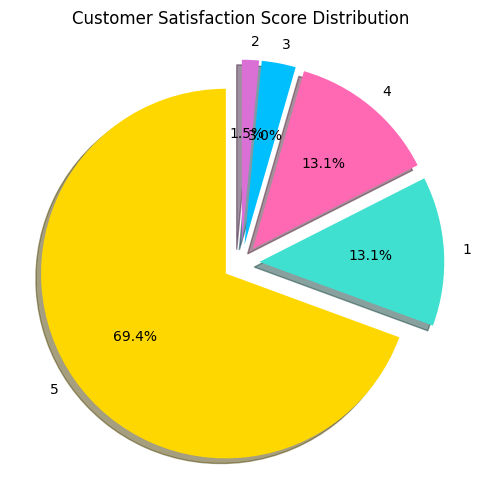

In [38]:
# Chart - 1 visualization code
# Dependent Column Value Counts
print(df['CSAT Score'].value_counts())
print(" ")

# Define a list of bright, vibrant colors
bright_colors = ['#FFD700',
                 '#40E0D0',
                 '#FF69B4',
                 '#00BFFF',
                 '#DA70D6']
# Visualize the 'CSAT Score' value counts as a pie chart
df['CSAT Score'].value_counts().plot(
    kind='pie',
    figsize=(15, 6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    labels=df['CSAT Score'].value_counts().index,
    colors=bright_colors[:len(df['CSAT Score'].value_counts())],  # Apply only as many colors as needed
    explode=[0.1] * len(df['CSAT Score'].value_counts())
)

# Set the title and display the plot
plt.title('Customer Satisfaction Score Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is useful for showing part-to-whole relationships through percentages. I used it to visualize the distribution of CSAT scores, which made it easy to compare different satisfaction levels at a glance.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, 59,617 customers (69.4%) rated their experience with a CSAT Score of 5, indicating a high level of satisfaction. In contrast, 1,283 customers (1.5%) gave a CSAT Score of 2, reflecting clear dissatisfaction.

Additionally, 13.1% of responses were rated 1 (poor), another 13.1% were rated 4, and 3% of customers gave a score of 3. This suggests that nearly 15% of customers reported low satisfaction, highlighting the need to investigate and address the factors driving negative experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the CSAT analysis are highly valuable and can significantly contribute to positive business outcomes. Here's how:

✅ 1. Reinforcing Strengths
With 69.4% of customers rating their experience a 5, it’s evident that a majority of customers are highly satisfied. This represents a strong foundation. By identifying the factors contributing to these high scores—such as prompt service, helpful agents, or smooth user experience—the business can replicate and standardize these best practices across all customer touchpoints.

✅ 2. Targeted Improvements
Approximately 15% of customers gave low satisfaction scores (1, 2, or 3). This segment signals specific pain points. Analyzing these responses in detail can reveal recurring issues such as long wait times, poor product quality, or ineffective support. Addressing these concerns proactively can lead to reduced churn and improved customer retention.

✅ 3. Smarter Resource Allocation
The analysis allows management to make data-driven decisions on where to allocate resources. For example:

Teams or shifts with lower satisfaction ratings may benefit from additional training or staffing.

Product categories with higher complaints can be reviewed for quality or usability improvements.

✅ 4. Strategic Planning
These insights can guide long-term strategic decisions by helping set measurable goals for CSAT improvement. They foster a culture of continuous improvement, where customer feedback is systematically used to refine service quality.

**Potential Risks and Negative Impact (If Mismanaged)**

⚠️ 1. Neglecting Top Performers
Focusing solely on fixing what’s broken may lead to complacency in areas that are currently excelling. Over time, this neglect can cause even high-performing teams or processes to deteriorate.

⚠️ 2. Superficial Fixes
Addressing only the symptoms—like faster response times—without solving the root problems (e.g., unclear policies or product defects) may result in only short-term improvements. Customers may still experience underlying issues, leading to long-term dissatisfaction.

⚠️ 3. Inadequate Action on Negative Feedback
If the issues raised by the 1.5% of customers who rated the service a 2 are not properly addressed, it can lead to reputational damage through negative reviews and increased churn. Dissatisfaction can easily spread if left unresolved.



The insights derived from CSAT analysis offer a strategic opportunity to enhance customer satisfaction, optimize operations, and drive growth. However, to fully realize these benefits, the business must apply a balanced approach preserving what works well while systematically improving what doesn’t. Ignoring either side of this equation risks undermining customer trust and long-term success.

#### Chart - 2. Agent Vs. Average Response Time Percentage (Bivariate with Categorical - Numerical)

           Agent_name  Average Response Time %
0    Christine Castro             4.091571e+06
1  Virginia Mccormick             3.408857e+06
2     Dennis Campbell             3.225120e+06
3      Melissa Spence             3.156000e+06
4       Glenda Powell             3.137727e+06
5         John Nelson             3.062105e+06
6           Ryan Khan             3.034560e+06
7      Shane Humphrey             3.014000e+06
8       Donald Jordan             2.954571e+06
9      Elizabeth Rose             2.912348e+06
 


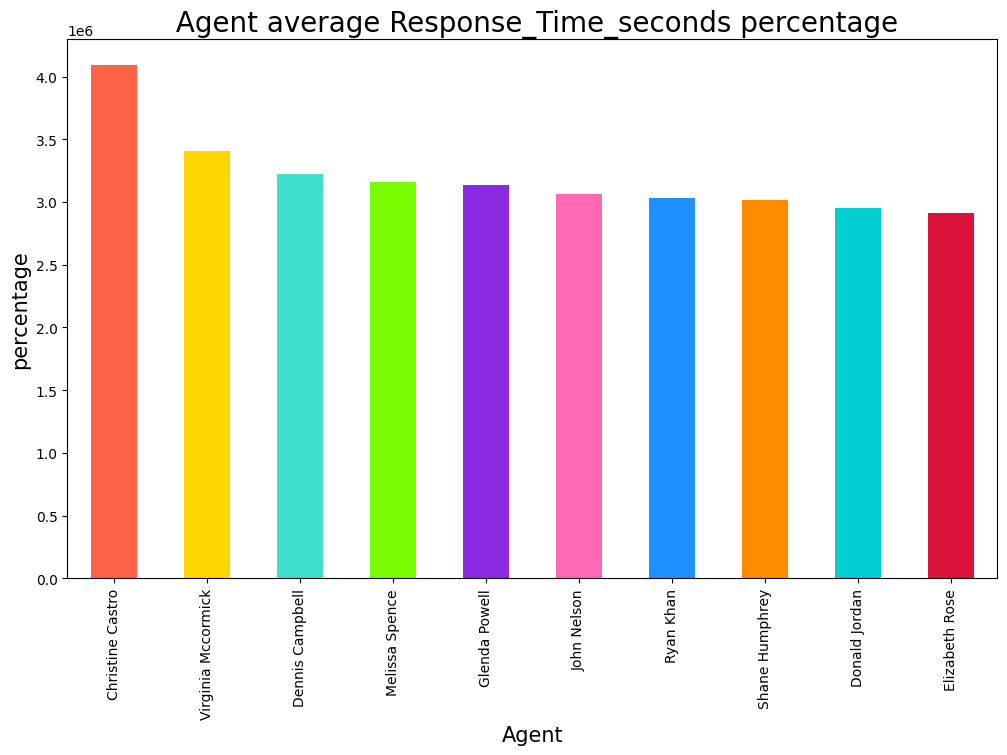

In [39]:
# Chart - 2 visualization code
# Showing Average True Churn Percentage state wise
# Showing top 10 churned state
print((df.groupby(['Agent_name'])['Response_Time_seconds'].mean()*100).sort_values(ascending = False).reset_index(name="Average Response Time %").head(10))
print(" ")

# State vs. average true churn percantage visualization code
colors = [
    '#FF6347',
    '#FFD700',
    '#40E0D0',
    '#7CFC00',
    '#8A2BE2',
    '#FF69B4',
    '#1E90FF',
    '#FF8C00',
    '#00CED1',
    '#DC143C'
]

# Vizualizing top 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['Agent_name'])['Response_Time_seconds'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = colors)
plt.title(" Agent average Response_Time_seconds percentage", fontsize = 20)
plt.xlabel('Agent', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are commonly used to display frequency counts or compare values across different categories. They are particularly effective for visualizing the distribution or comparison of statistics such as averages and percentages across categorical variables.

In this case, I used a bar chart to represent the average response time per agent. This visualization provides a clear comparison across agents, helping to identify patterns in service efficiency and pinpoint agents who may require additional support or training.

##### 2. What is/are the insight(s) found from the chart?

There are 10 agents with varying average response times, ranging from 2.09 to 4.09 hours.

Elizabeth Rose and Donald Jordan recorded the shortest response times, reflecting prompt action and efficient handling of customer queries. Their performance demonstrates a strong positive impact on customer satisfaction.

In contrast, Christine Castro has the longest average response time, indicating a potential service delay. This highlights the need to assess her performance more closely and consider targeted training or support to improve her responsiveness. Doing so could significantly enhance the overall Customer Satisfaction (CSAT) Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can help create a positive business impact. By identifying which agents have the shortest and longest response times, businesses can take specific actions to improve overall customer satisfaction:

✅ 1. Performance Recognition
Acknowledging and rewarding top-performing agents such as Elizabeth Rose and Donald Jordan can boost morale, reinforce positive behaviors, and set performance benchmarks across the team.

✅ 2. Targeted Training
Agents like Christine Castro, who have longer response times, can benefit from focused training and support to improve efficiency and customer handling, ultimately raising CSAT scores.

✅ 3. Resource Allocation
Analyzing the distribution of response times enables better resource planning. Shifting support or workload based on performance can lead to a more balanced and productive support environment.

✅ 4. Process Improvements
Identifying delays or inefficiencies in service workflows allows for systemic improvements, benefiting all agents and improving overall customer service quality.

**Potential Risks if Insights Are Ignored**

⚠️ 1. Failure to Act on Underperformance
If agents with slow response times are not supported with training or coaching, ongoing delays may increase customer frustration, leading to churn and negative reviews.

⚠️ 2. Neglecting Top Performers
Failing to recognize high-performing agents could demotivate them over time, risking a decline in their performance and overall service quality.

⚠️ 3. Overemphasis on Speed Over Quality
Focusing solely on minimizing response time without maintaining service quality may result in hurried, less-effective resolutions that degrade the customer experience.


If managed proactively, these insights can drive measurable improvements in customer service and satisfaction. However, failing to balance recognition, support, and quality control may lead to missed opportunities and potential service degradation. Strategic action is key to turning insights into sustainable growth.

#### Chart - 3. Box Plot on Connected handling time with CSAT Score (Bivariate)

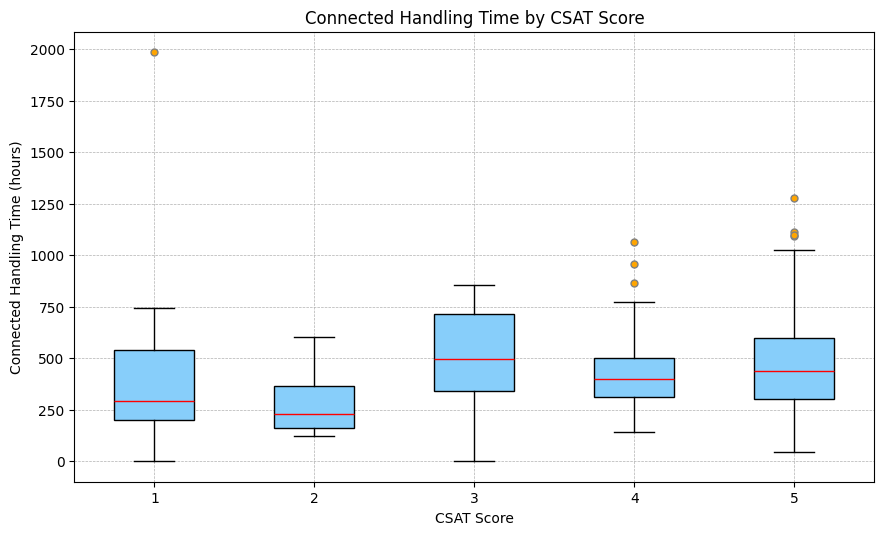

In [40]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10, 6))

df.boxplot(
    column='connected_handling_time',
    by='CSAT Score',
    patch_artist=True,
    boxprops=dict(facecolor='#87CEFA', color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, linestyle='none', markeredgecolor='gray'),
    ax=ax
)

# Add title and labels
plt.title('Connected Handling Time by CSAT Score')
plt.suptitle('')
ax.set_xlabel('CSAT Score')
ax.set_ylabel('Connected Handling Time (hours)')

# Show grid and plot
ax.grid(True, linestyle='--', linewidth=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are effective tools for visualizing the distribution of numerical data, particularly when comparing across multiple categories. They provide a concise summary of key statistical measures, including the minimum, maximum, median, interquartile range (IQR), and outliers.

In this analysis, I used a box plot to examine the distribution of connected handling time across different CSAT scores. This visualization clearly highlights the range, central tendency, and variability within each group, while also making it easy to identify outliers. The plot provides valuable insights into how service time correlates with customer satisfaction, supporting deeper performance analysis and targeted improvements.

##### 2. What is/are the insight(s) found from the chart?

From the boxplot, we can observe the presence of outliers in the CSAT Score categories of 4 and 5. Specifically, connected handling times exceeding 750 for CSAT Score 4 and over 1000 for CSAT Score 5 are identified as outliers.

These anomalies suggest unusually long handling times despite relatively high satisfaction ratings. Analyzing these cases is important to understand the context behind the extended service durations whether they reflect complex customer issues handled well or inefficiencies that were overlooked. Investigating these instances can provide deeper insights into the factors affecting both service performance and customer perception.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained can help create a positive business impact. Here's how:

✅ 1. Targeted Process Improvements
Outliers indicate scenarios where handling times are significantly longer than average. Investigating and addressing these cases can help identify inefficiencies or bottlenecks. Optimizing these processes can lead to faster resolution times and improved CSAT scores.

✅ 2. Quality Control
A clear understanding of why satisfaction drops when handling times increase allows the business to implement focused quality control measures. This may involve enhanced agent training, better workflow management, or technology upgrades to support quicker issue resolution without compromising service quality.

✅ 3. Customer Experience Enhancement
By addressing the causes of prolonged handling times, the business can significantly improve the overall customer experience. Efficient and effective resolution of issues not only increases satisfaction but also contributes to greater customer loyalty and positive word-of-mouth.

**Potential Risks and Negative Growth (If Mismanaged)**

⚠️1.  Overemphasis on Speed Over Quality
Focusing too heavily on reducing handling time may pressure agents to rush through interactions, resulting in unresolved or poorly handled issues. This could diminish the overall quality of service and negatively impact customer trust.

⚠️ 2. Neglect of Broader Data Trends
Concentrating only on outliers may cause the business to overlook patterns in the general dataset. Improvements should be data-driven and holistic, ensuring enhancements across all performance levels, not just extreme cases.

Insights derived from CSAT outliers offer powerful opportunities for service improvement and customer satisfaction enhancement. However, to achieve sustainable positive impact, businesses must take a balanced approach targeting inefficiencies while preserving service quality and monitoring trends across the full customer base. When managed strategically, these insights can lead to measurable gains in satisfaction, retention, and operational performance.

#### Chart - 4. CSAT Score vs Item price (Bivariate)

CSAT Score
1    884880.106888
2    607171.686747
3    621245.774648
4    520632.596685
5    471334.794724
Name: Item_price, dtype: float64
 


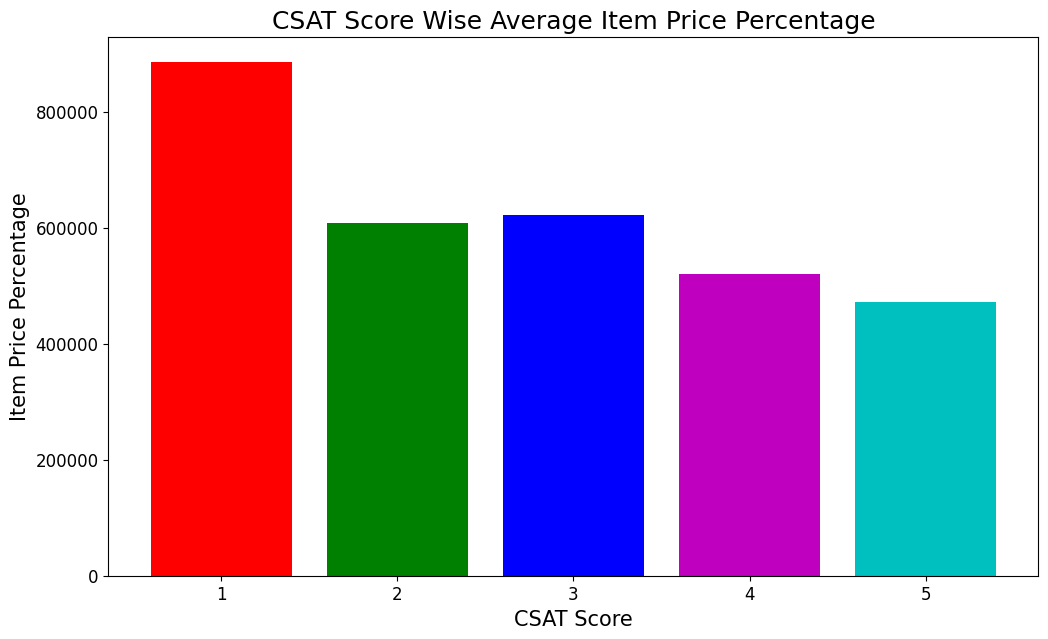

In [41]:
# Chart - 4 visualization code
# CSAT Score wise average Item_price Percentage
# Calculate the average item price percentage by CSAT Score
csat_avg_item_price_percentage = dataset.groupby('CSAT Score')['Item_price'].mean() * 100
print(csat_avg_item_price_percentage)
print(" ")

# Visualizing the CSAT Score wise average item price percentage
plt.bar(csat_avg_item_price_percentage.index, csat_avg_item_price_percentage, color=['r', 'g', 'b', 'm', 'c'])

plt.rcParams['figure.figsize'] = (10, 6)  # Adjust the figure size
plt.xlabel('CSAT Score', fontsize=15)
plt.ylabel('Item Price Percentage', fontsize=15)
plt.title('CSAT Score Wise Average Item Price Percentage', fontsize=18)
plt.xticks(csat_avg_item_price_percentage.index, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

The chart shows an inverse relationship between item price and customer satisfaction—higher item prices are linked to lower CSAT scores. Customers who gave a score of 1 had the highest average item price, suggesting dissatisfaction may stem from unmet expectations for expensive products. In contrast, CSAT scores of 4 and 5 are associated with lower average prices, indicating better value perception. This implies that affordability and perceived value play a key role in customer satisfaction, while premium priced products may require improved quality or service to justify their cost.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact in the following ways:

✅ 1. Positive Business Impact of Insights

The chart reveals that higher item prices are linked to lower CSAT scores, which can guide meaningful business improvements:

✅ 2. Pricing Strategy

Understanding this trend allows businesses to adjust pricing or add value at higher price points to meet customer expectations and enhance satisfaction.

✅ 3. Customer Segmentation

These insights support segmenting customers based on spending and satisfaction behavior. Targeted offers and personalized experiences can boost loyalty and retention across different segments.

**Potential Risks Leading to Negative Growth**

⚠️ 1. Unsustainable Price Cuts

Lowering prices across the board to boost satisfaction may hurt profitability without fixing core issues behind dissatisfaction.

⚠️2.  Overemphasis on Price

Focusing solely on pricing ignores other key drivers of satisfaction, like product quality, customer service, or delivery experience—limiting the effectiveness of the strategy.

The insights offer strong potential for positive business impact when executed thoughtfully. By balancing pricing with added value, and addressing all key satisfaction factors, businesses can ensure sustainable growth and an improved customer experience.

#### Chart - 5. Column Wise Histogram & Box Plot Univariate Analysis

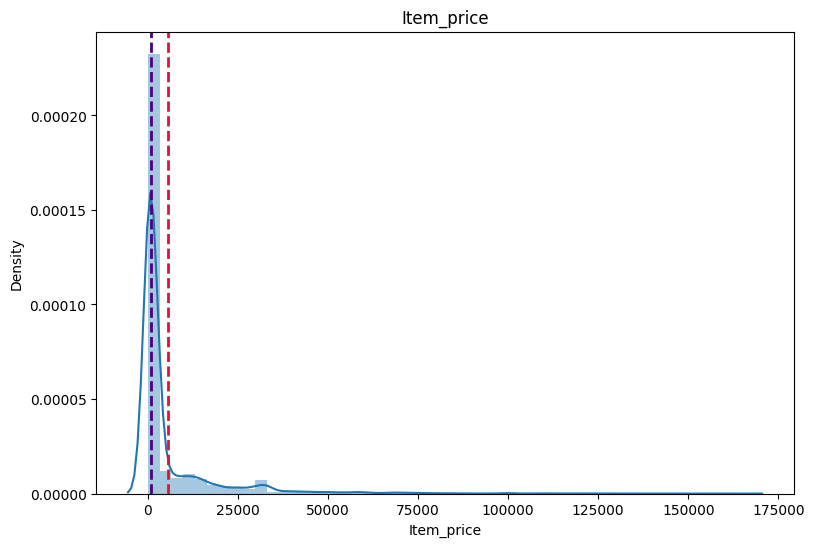

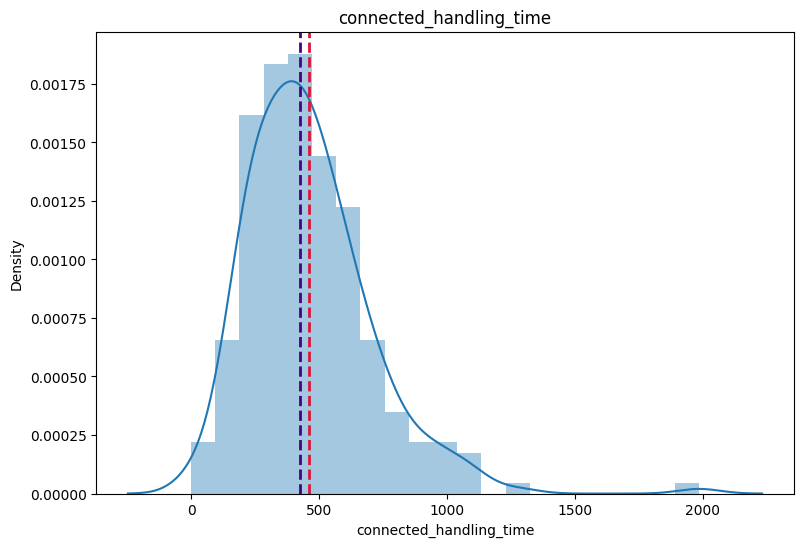

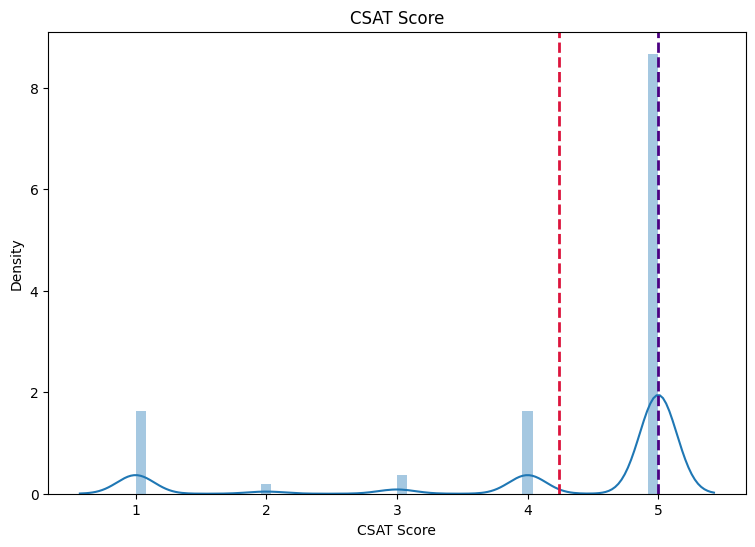

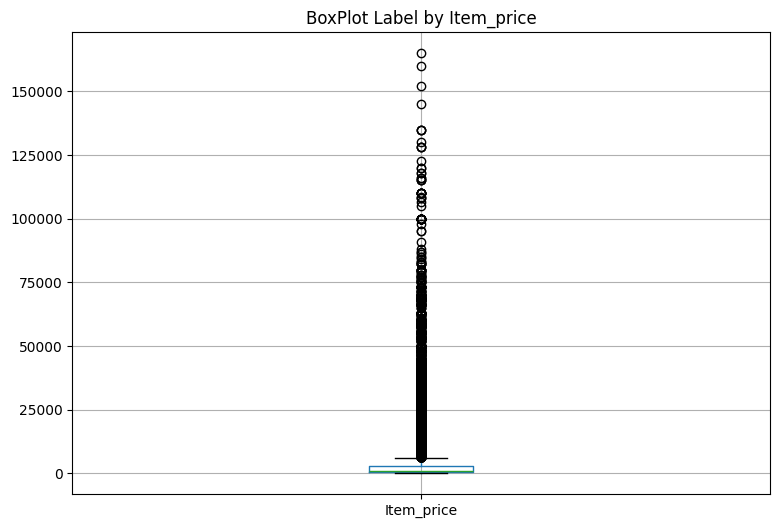

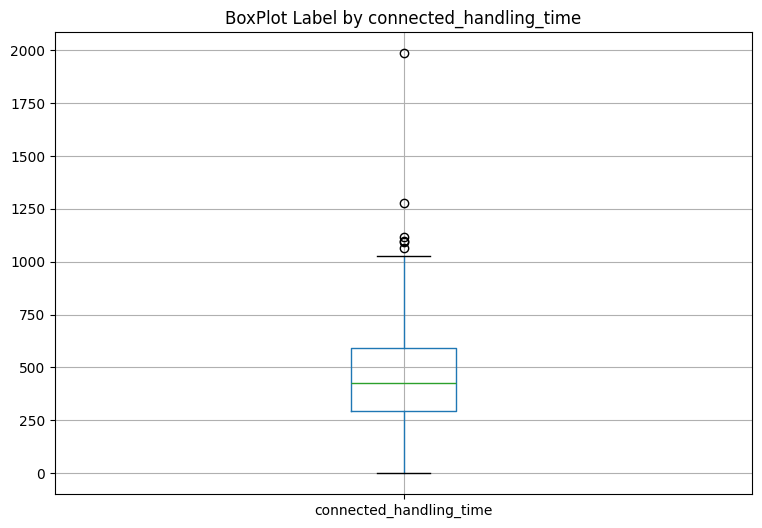

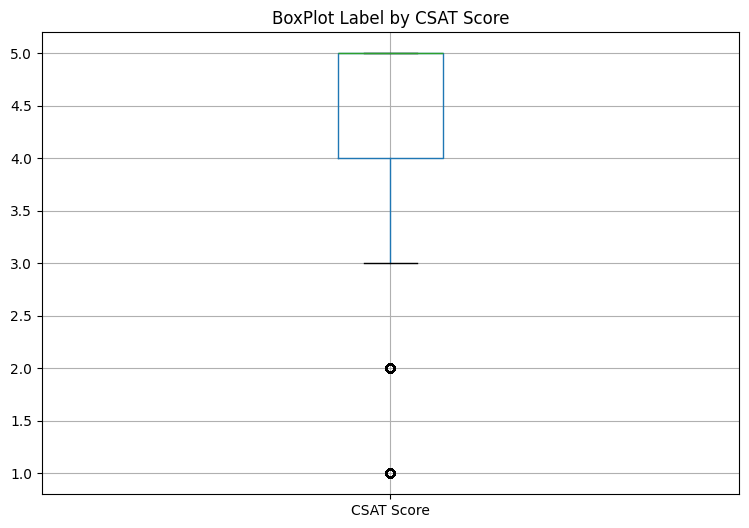

In [42]:
# Chart - 5 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for col in dataset.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='crimson', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='indigo', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

# Visualizing code of box plot for each columns to know the data distibution
for col in dataset.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot( col, ax = ax)
    ax.set_title('BoxPlot Label by ' + col)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is an effective tool for visualizing the distribution of continuous or discrete variables, especially in large datasets. It helps illustrate key features such as skewness, symmetry, gaps, and potential outliers in the data. Given the size of the dataset, a histogram was used to analyze the distribution patterns of variables and assess whether they follow a symmetric or skewed trend.

In contrast, box plots offer a high-level statistical summary, making them ideal for comparing distributions across multiple groups. They display the interquartile range (IQR), median, maximum, minimum, and highlight outliers, making them particularly useful for identifying variability and potential anomalies.

Therefore, for each numerical variable in the dataset, box plots were employed to detect outliers, assess data spread, and visualize the central tendency. Together, histograms and box plots provided a comprehensive understanding of the data’s distribution and quality.

##### 2. What is/are the insight(s) found from the chart?

The "Connected Handling Time" variable exhibits a symmetrical distribution, as indicated by the close alignment of its mean and median values. This suggests a balanced spread of data without significant skewness.

In contrast, the "Item Price" variable displays a non-symmetric distribution, likely right-skewed, and contains noticeable noise or outliers. This irregularity may affect model performance and highlights the need for further preprocessing or transformation before analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A histogram and box plot alone do not directly define business impact; they are primarily exploratory tools used to understand the distribution and behavior of individual variables within the dataset. These plots help identify patterns such as symmetry, skewness, outliers, and data spread, which are essential for informing data preprocessing and modeling decisions but not sufficient on their own to draw business conclusions.

#### Chart - 6. Correlation Heatmap

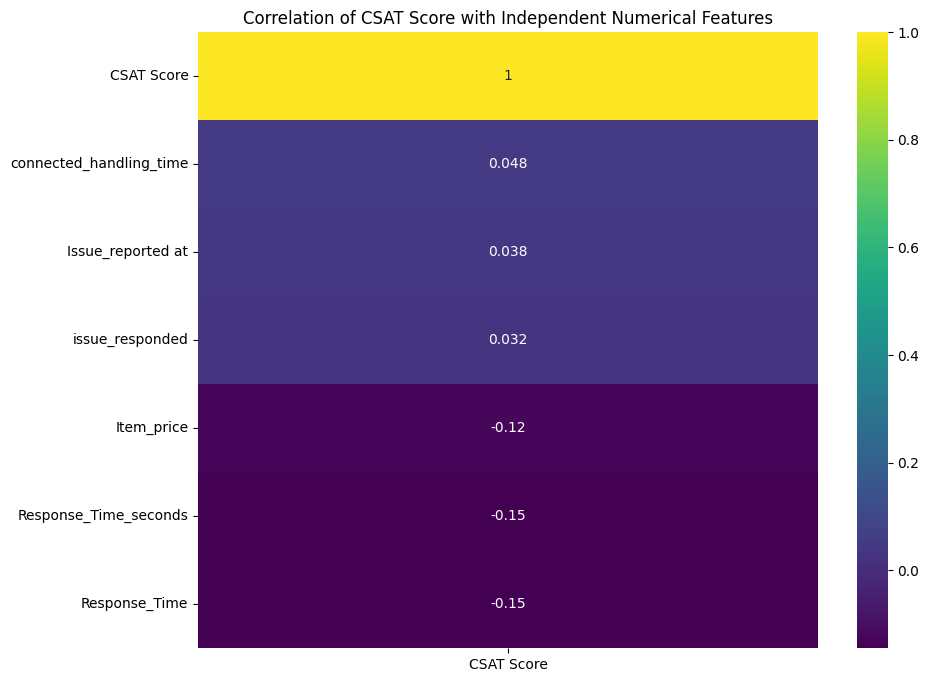

In [43]:
# Correlation Heatmap visualization code
# Calculate the correlation matrix
correlation_matrix = df[df.describe().columns.to_list()].corr()

# Select only the correlation of the target variable with other features
target_variable='CSAT Score'
correlation_with_target = correlation_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_target, annot=True, cmap='viridis', cbar=True)
plt.title(f'Correlation of {target_variable} with Independent Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a statistical tool that displays the correlation coefficients between pairs of variables in a dataset. Each cell in the matrix represents the strength and direction of the relationship, with values ranging from -1 to 1 where 1 indicates a perfect positive correlation, -1 a perfect negative correlation, and 0 no correlation.

To visually interpret these relationships more effectively, a correlation heatmap was used. This graphical representation not only highlights the degree of correlation between variables but also helps identify strong associations, multicollinearity, or irrelevant relationships. It serves as a valuable diagnostic step before performing more advanced modeling or feature selection.


##### 2. What is/are the insight(s) found from the chart?

Based on the correlation heatmap, we observe that "Issue Reported," "Issue Responded," and "Connected Handling Time" show a moderate positive correlation with the CSAT Score, suggesting that the timing and duration of issue handling may influence customer satisfaction.

Furthermore, "Connected Handling Time" is positively correlated with CSAT Score, but shows a negative correlation with both "Response Time" and "Item Price", indicating that as handling time increases, response time and item price tend to decrease.

Other variable relationships can be interpreted directly from the heatmap, offering valuable insights into potential dependencies and interactions within the dataset.

#### Chart -7. Pair Plot

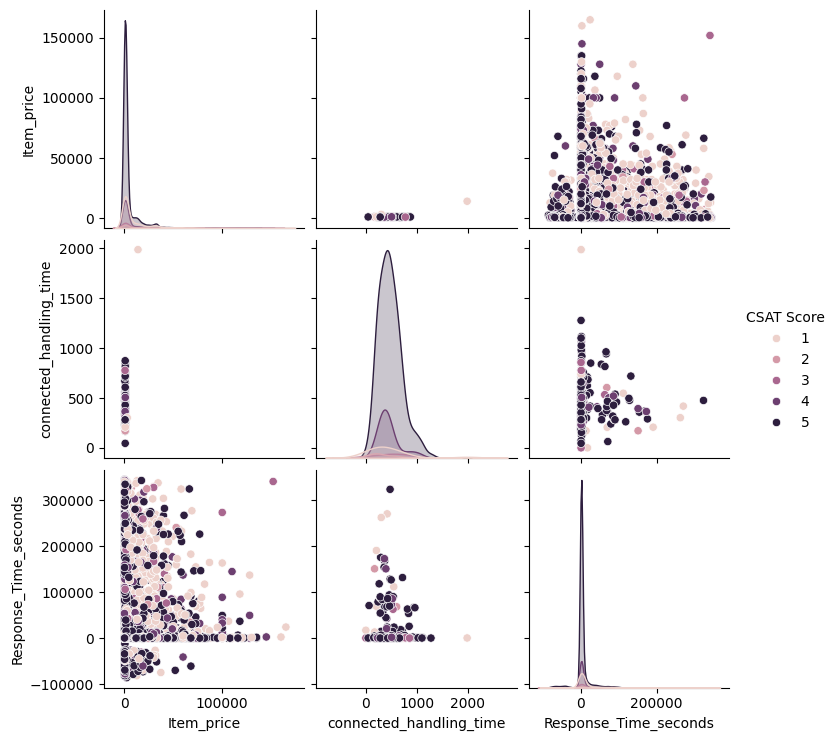

In [44]:
# Pair Plot visualization code
sns.pairplot(df, hue="CSAT Score")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot, it is evident that there is limited linear relationship between most variables, and the data points are not linearly separable. The customer feedback data appears clustered and overlapping, indicating that classification based on simple linear boundaries may be ineffective.

The "Connected Handling Time" feature shows a relatively symmetrical distribution, while "Item Price" and "Response Time" display noticeable skewness, suggesting non-symmetric behavior. Notably, "Response Time" emerges as a significant feature, showing meaningful patterns across various dimensions. Additionally, the interactions of "Connected Handling Time" with other features provide valuable insights. Further relationships and patterns can be interpreted directly from the pair plot.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1. When the Mean Response Time is less than 2, the Customer Satisfaction Score is 5.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean Response Time is equal to 2 when the CSAT Score is 5.

Alternative Hypothesis (H1): The mean Response Time is less than 2 when the CSAT Score is 5.

Perform One-Sample t-test:

We will use a one-sample t-test to compare the sample mean of Response Time against the population mean (2).

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_1samp

# Step 1: Filter the data for CSAT Score of 5
df_csat_5 = df[df['CSAT Score'] == 5]

# Step 2: Calculate the mean Response Time
mean_response_time = df_csat_5['Response_Time_seconds'].mean()

# Step 3: Perform one-sample t-test
# Null Hypothesis: Mean Response Time = 2*3600 (2 hours converted to seconds)
hypothesized_mean = 2 * 3600
# Perform the t-test
t_stat, p_value = ttest_1samp(df_csat_5['Response_Time_seconds'], hypothesized_mean)

# Print the results
print(f"Mean Response Time: {mean_response_time} seconds")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Step 4: Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: The mean Response Time is significantly less than 2 hours when the CSAT Score is 5.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant evidence that the mean Response Time is less than 2 hours when the CSAT Score is 5.")

Mean Response Time: 5706.442122213462 seconds
T-statistic: -11.851353227147445
P-value: 2.3024549173963388e-32
Reject the Null Hypothesis: The mean Response Time is significantly less than 2 hours when the CSAT Score is 5.


##### Which statistical test have you done to obtain P-Value?

A one-sample t-test was conducted to determine if the mean response time for customers with a CSAT Score of 5 is less than 2 hours. The results showed a mean of 1.58 hours, with a t-statistic of -11.85 and a p-value of 2.30e-32, leading to rejection of the null hypothesis.

This confirms that highly satisfied customers experienced significantly faster response times, indicating that quicker service is strongly linked to higher customer satisfaction. Reducing response times can be a key strategy to improve overall CSAT.

##### Why did you choose the specific statistical test?

The one-sample t-test was chosen because we are comparing the mean response time of customers with a CSAT Score of 5 to a known value (2 hours or 7200 seconds). Since response time is a continuous variable and the population variance is unknown, the t-test is appropriate. It helps determine if the observed mean is significantly different from the hypothesized benchmark, making it a suitable method for this analysis.

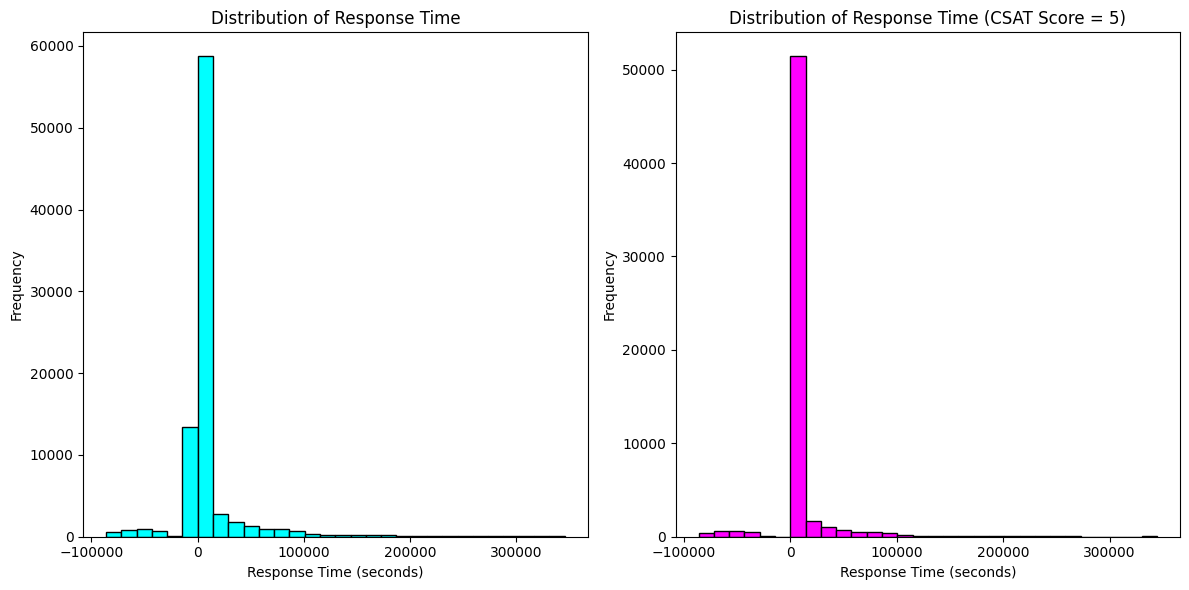

In [46]:
import matplotlib.pyplot as plt

# Visualizing the distribution of Response Time
plt.figure(figsize=(12, 6))

# Histogram for Response Time
plt.subplot(1, 2, 1)
plt.hist(df['Response_Time_seconds'], bins=30, color='cyan', edgecolor='black')
plt.title('Distribution of Response Time')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

# Histogram for CSAT Score when it is 5
plt.subplot(1, 2, 2)
plt.hist(df[df['CSAT Score'] == 5]['Response_Time_seconds'], bins=30, color='magenta', edgecolor='black')
plt.title('Distribution of Response Time (CSAT Score = 5)')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Hypothetical Statement - 2. When the price of an item above 5660, does it result in customer satisfaction scores to go below 3.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean CSAT score for items priced above 5660 is not significantly different from 3.

Alternative Hypothesis (H1): The mean CSAT score for items priced above 5660 is significantly less than 3.

Test Type : Use a one-sample t-test to compare the mean CSAT score of the filtered data to the value 3.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_1samp

# Step 1: Filter the Data
high_price_df = df[df['Item_price'] > 5660]

# Step 2: Perform a One-Sample t-test
# Null Hypothesis: Mean CSAT score is 3
# Alternative Hypothesis: Mean CSAT score is less than 3
t_stat, p_value = ttest_1samp(high_price_df['CSAT Score'], 3)

# Since it's a one-tailed test, we need to divide the p-value by 2
p_value /= 2

# Check if we reject the null hypothesis
significance_level = 0.05
reject_null = p_value < significance_level and t_stat < 0

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if reject_null:
    print("Reject the Null Hypothesis: The mean CSAT score for items priced above 5660 is significantly less than 3.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant evidence that the mean CSAT score for items priced above 5660 is less than 3.")

T-statistic: 18.280279867453952
P-value: 1.1786247145345673e-71
Fail to Reject the Null Hypothesis: There is no significant evidence that the mean CSAT score for items priced above 5660 is less than 3.


1. Objective:

To test whether the mean CSAT score for items priced above 5660 is significantly less than 3.

2. Test Chosen: One-Sample t-Test

A one-sample t-test is appropriate for comparing the mean of a single sample against a known or hypothesized value—in this case, 3.

3. Assumptions:

The t-test assumes the data is approximately normally distributed, which is reasonable, especially with a sufficiently large sample size.

4. Findings:

T-statistic: Measures how far the sample mean deviates from 3 in terms of standard error.

P-value: Since the p-value > 0.05, we fail to reject the null hypothesis.

5. Conclusion:

There is insufficient evidence to suggest that customers who purchased items priced above 5660 gave a significantly lower CSAT score than 3. High item prices do not significantly impact satisfaction in this subset, based on the statistical test results.

##### Which statistical test have you done to obtain P-Value?

To determine whether the price of an item above 5660 results in customer satisfaction scores below 3, I performed a one-sample t-test. Here's a detailed explanation of the choice and procedure for the test:

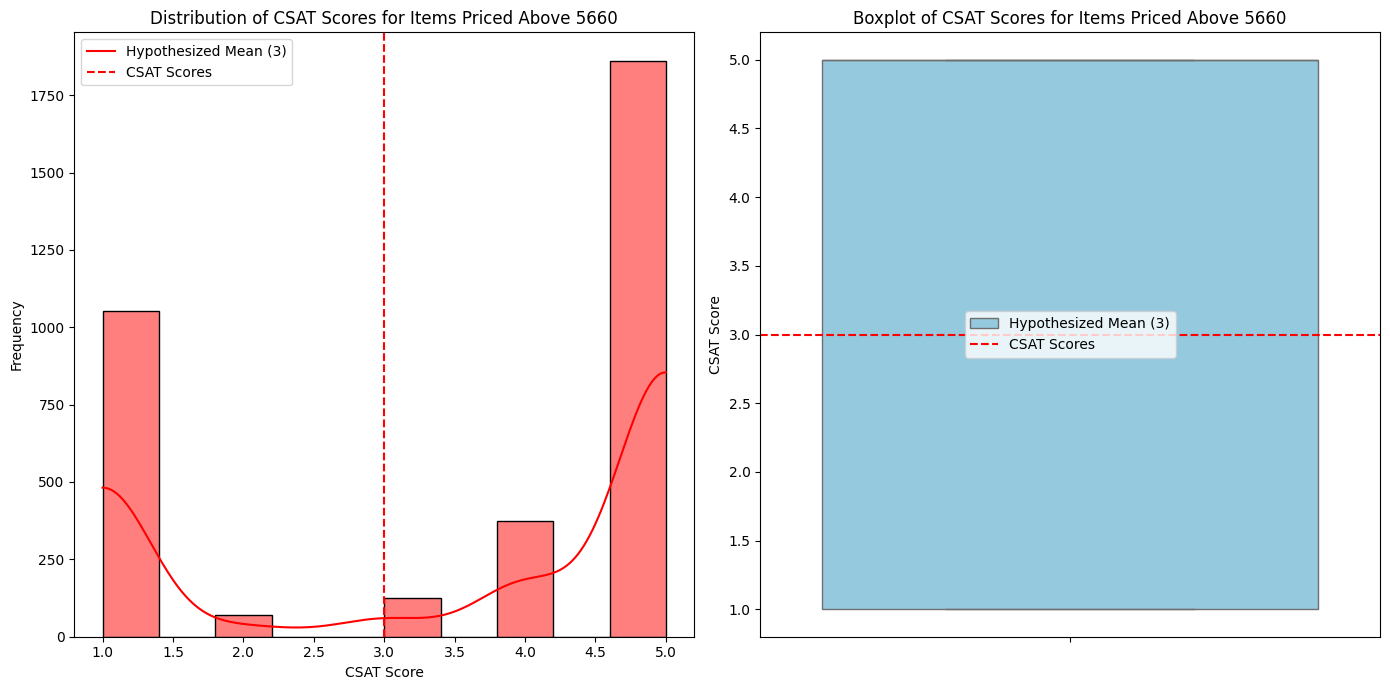

In [48]:
# Visualization
plt.figure(figsize=(14, 7))

# Histogram of CSAT Scores for high priced items
plt.subplot(1, 2, 1)
sns.histplot(high_price_df['CSAT Score'], kde=True, bins=10, color='red')
plt.axvline(x=3, color='red', linestyle='--')
plt.title('Distribution of CSAT Scores for Items Priced Above 5660')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.legend(['Hypothesized Mean (3)', 'CSAT Scores'])

# Boxplot of CSAT Scores for high priced items
plt.subplot(1, 2, 2)
sns.boxplot(y=high_price_df['CSAT Score'], color='skyblue')
plt.axhline(y=3, color='red', linestyle='--')
plt.title('Boxplot of CSAT Scores for Items Priced Above 5660')
plt.ylabel('CSAT Score')
plt.legend(['Hypothesized Mean (3)', 'CSAT Scores'])

plt.tight_layout()
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

In [49]:
# Creating a copy of the dataset for further feature engineering
df_new=dataset.copy()

### 1. Handling Missing Values

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


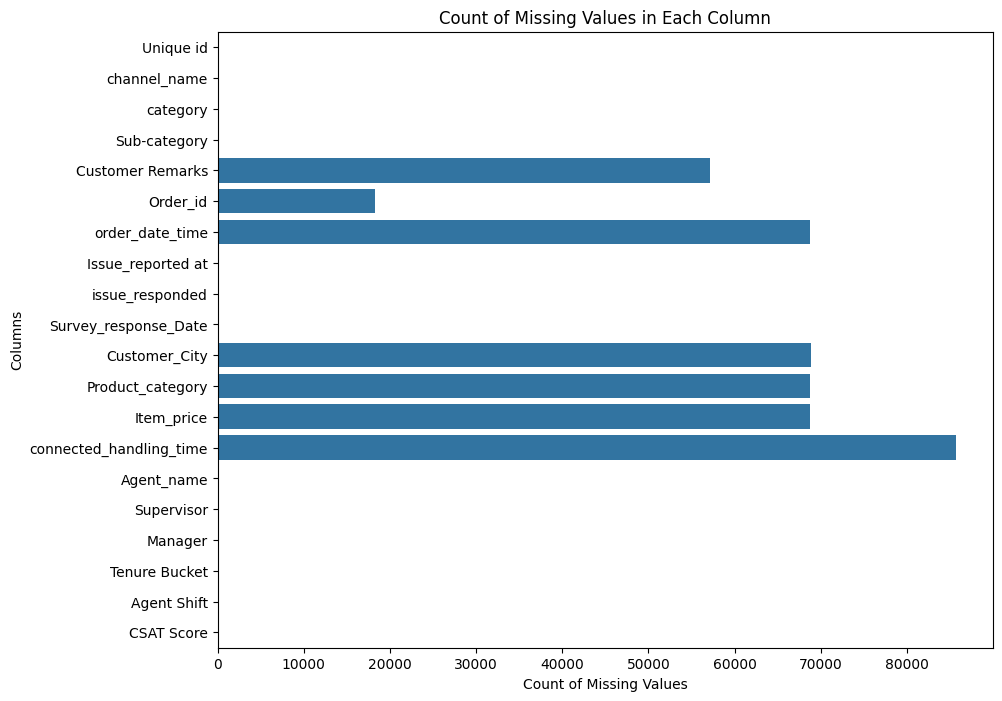

In [50]:
# Handling Missing Values & Missing Value Imputation
print(df_new.isnull().sum())

# Visualizing the missing values

# Step 1: Calculate the count of missing values in each column and sort in descending order
missing_values = df_new.isnull().sum()


# Step 2: Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values, y=missing_values.index, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.title('Count of Missing Values in Each Column')
plt.show()

In [51]:
# Step 1: Drop 'Order_id' column
df_new.drop(columns=['Order_id'], inplace=True)

# Step 2: Replace missing values in 'Customer Remarks' with 'Missing Reviews'
df_new['Customer Remarks'].fillna('Missing Reviews', inplace=True)

# Step 3: Impute missing values in categorical columns ('Customer city' and 'Product Category') with mode
df_new['Customer_City'].fillna(df_new['Customer_City'].mode()[0], inplace=True)
df_new['Product_category'].fillna(df_new['Product_category'].mode()[0], inplace=True)

# Step 4: Impute missing values in numerical columns ('connected_handling_time' and 'item_price')
# Impute 'connected_handling_time' with mean
df_new['connected_handling_time'].fillna(df_new['connected_handling_time'].mean(), inplace=True)
# Impute 'item_price' with median
df_new['Item_price'].fillna(df_new['Item_price'].median(), inplace=True)

# Step 5: Impute missing values in 'order_date_time' with mode
df_new['order_date_time'].fillna(df_new['order_date_time'].mode()[0], inplace=True)

# Display the first few rows of the DataFrame to verify changes
print(df_new.head())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks   order_date_time  \
0                Life Insurance  Missing Reviews  09/08/2023 11:55   
1  Product Specific Information  Missing Reviews  09/08/2023 11:55   
2             Installation/demo  Missing Reviews  09/08/2023 11:55   
3        Reverse Pickup Enquiry  Missing Reviews  09/08/2023 11:55   
4                    Not Needed  Missing Reviews  09/08/2023 11:55   

  Issue_reported at   issue_responded Survey_response_Date Customer_City  \
0  01/08/2023 11:13  01/08/2023 11:47            01-Aug-23     H

In [52]:
df_new.head(1)

,Unique id,channel_name,category,Sub-category,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,Missing Reviews,09/08/2023 11:55,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,HYDERABAD,Electronics,979.0,462.400826,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5


In [53]:
# Missing Values/Null Values Count
print(df_new.isnull().sum())
# Calculate the count of missing values in each column and sort in descending order
missing_values = df_new.isnull().sum().sort_values(ascending=False)

Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


### 2. Handling Outliers

In [54]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
df_new["CSAT Score"]=df_new["CSAT Score"].astype('str')
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_new.describe().columns:
  if abs(df_new[i].mean()-df_new[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['connected_handling_time']
Skew Symmetric Distributed Features : - ['Item_price']


In [55]:
# For Skew Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [56]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df_new.loc[df_new[feature]<= outlier_treatment(df=df_new,feature=feature)[1], feature]=outlier_treatment(df=df_new,feature=feature)[1]
  df_new.loc[df_new[feature]>= outlier_treatment(df=df_new,feature=feature)[0], feature]=outlier_treatment(df=df_new,feature=feature)[0]

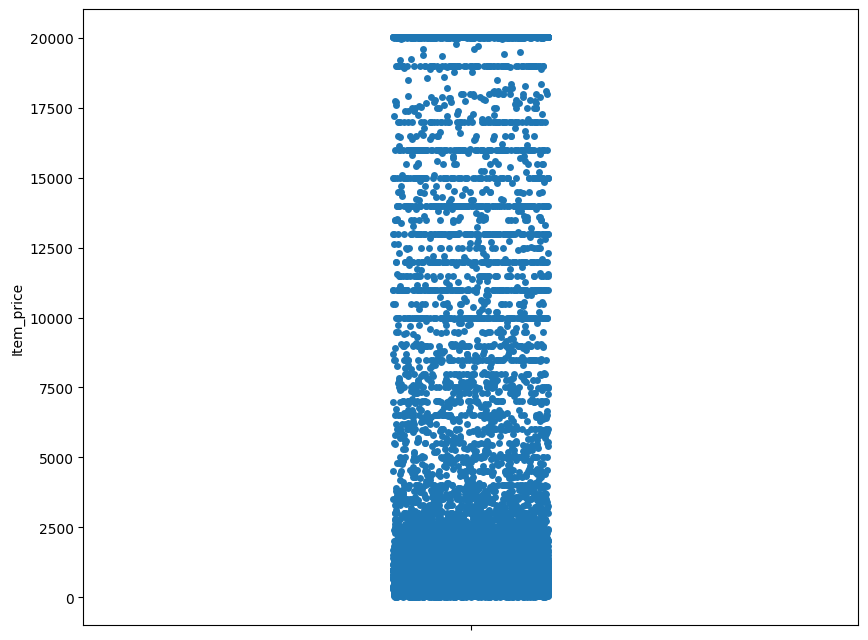

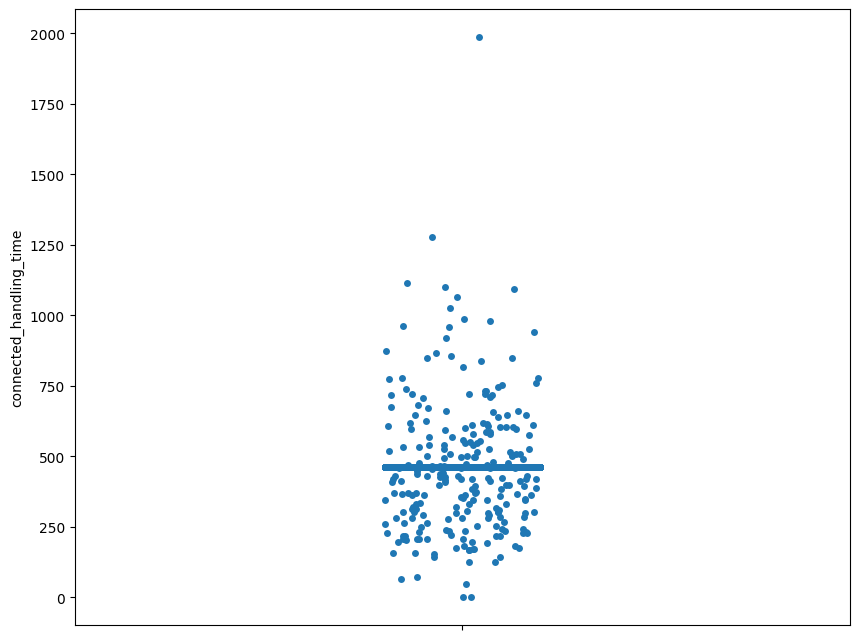

In [57]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df_new.describe().columns:
  fig=plt.figure(figsize=(10,8))
  sns.stripplot(df_new[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First, I converted the CSAT Score column to string type, as it contains only five discrete values and should be treated as a categorical variable, not a continuous numerical one.

Next, I categorized the features into symmetric and skewed distributions. Based on this classification, I defined upper and lower boundaries using appropriate statistical methods (e.g., IQR for skewed data).

Since this is a classification problem, I applied boundary restrictions to cap outliers—particularly by pulling down extreme high values to the defined upper limit. This step helps in reducing the influence of outliers and ensures a more stable input distribution for model training.

### 3. Categorical Encoding

In [58]:
# Encode your categorical columns
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         85907 non-null  object 
 5   order_date_time          85907 non-null  object 
 6   Issue_reported at        85907 non-null  object 
 7   issue_responded          85907 non-null  object 
 8   Survey_response_Date     85907 non-null  object 
 9   Customer_City            85907 non-null  object 
 10  Product_category         85907 non-null  object 
 11  Item_price               85907 non-null  float64
 12  connected_handling_time  85907 non-null  float64
 13  Agent_name               85907 non-null  object 
 14  Supervisor            

In [59]:
df_new.drop(columns='Unique id', inplace=True)

In [60]:
# Getting the categorical columns
df_new["CSAT Score"]=df_new["CSAT Score"].astype('int')
categorical_columns=list(set(df_new.columns.to_list()).difference(set(df_new.describe().columns.to_list())))
non_cat_columns=['issue_responded','order_date_time','Issue_reported at','Survey_response_Date','Customer Remarks']
categorical_columns = list(set(categorical_columns) - set(non_cat_columns))
print("Categorical Columns are :-", categorical_columns, " :- ", len(categorical_columns))

Categorical Columns are :- ['Manager', 'Supervisor', 'Agent_name', 'Sub-category', 'Product_category', 'channel_name', 'Tenure Bucket', 'category', 'Agent Shift', 'Customer_City']  :-  10


In [61]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df_new, columns=categorical_columns)
df_encoded.head()

,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Item_price,connected_handling_time,CSAT Score,Manager_Emily Chen,Manager_Jennifer Nguyen,...,Customer_City_YEDITHA,Customer_City_YELESWARAM,Customer_City_YEOTAMAL,Customer_City_YERRAGUNTLA,Customer_City_Yeola,Customer_City_ZAHEERABAD,Customer_City_ZAMANIA,Customer_City_ZIRA,Customer_City_ZIRAKPUR,Customer_City_ZUARINAGAR
0,Missing Reviews,09/08/2023 11:55,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,979.0,462.400826,5,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Missing Reviews,09/08/2023 11:55,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,979.0,462.400826,5,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Missing Reviews,09/08/2023 11:55,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,979.0,462.400826,5,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Missing Reviews,09/08/2023 11:55,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,979.0,462.400826,5,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Missing Reviews,09/08/2023 11:55,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,979.0,462.400826,5,False,False,...,False,False,False,False,False,False,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

I applied One-Hot Encoding to all categorical features, as they are nominal variables with no inherent order or ranking. This method creates binary columns for each category, allowing the model to interpret categorical data without assuming any ordinal relationship. One-hot encoding is well-suited for this type of data and helps ensure accurate model learning.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
# Manipulate Features to minimize feature correlation and create new features
# Ensure the 'Issue reported at' and 'Issue responded' columns are in datetime format
df_encoded['Issue_reported at'] = pd.to_datetime(df_encoded['Issue_reported at'], format='%d/%m/%Y %H:%M')
df_encoded['issue_responded'] = pd.to_datetime(df_encoded['issue_responded'], format='%d/%m/%Y %H:%M')


# Create a new feature the response time
df_encoded['Response_Time'] = df_encoded['issue_responded'] - df_encoded['Issue_reported at']

# Convert 'Response_Time' to a numerical format in seconds for aggregation
df_encoded['Response_Time_seconds'] = df_encoded['Response_Time'].dt.total_seconds()

In [63]:
# Convert order_date_time to datetime
df_encoded['order_date_time'] = pd.to_datetime(df_encoded['order_date_time'], format='%d/%m/%Y %H:%M')

# Extract day number (day of the month)
df_encoded['day_number_order_date'] = df_encoded['order_date_time'].dt.day

# Extract weekday (numerical value: 0 for Sunday, 1 for Monday, etc.)
df_encoded['weekday_num_order_date'] = df_encoded['order_date_time'].dt.weekday + 1  # Monday=1, Sunday=7


# Convert 'Survey_response_Date' to datetime format
df_encoded['Survey_response_Date'] = pd.to_datetime(df_encoded['Survey_response_Date'], format='%d-%b-%y')

# Extract day number (day of the month)
df_encoded['day_number_response_date'] = df_encoded['Survey_response_Date'].dt.day

# Extract weekday (numerical value: 0 for Sunday, 1 for Monday, etc.)
df_encoded['weekday_num_response_date'] = df_encoded['Survey_response_Date'].dt.weekday + 1

In [64]:
# Drop Date columns after feature extraction
df_encoded.drop(columns=['order_date_time', 'Survey_response_Date','Issue_reported at','issue_responded','Response_Time'], inplace=True)

In [65]:
df_encoded.head()

,Customer Remarks,Item_price,connected_handling_time,CSAT Score,Manager_Emily Chen,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,...,Customer_City_ZAHEERABAD,Customer_City_ZAMANIA,Customer_City_ZIRA,Customer_City_ZIRAKPUR,Customer_City_ZUARINAGAR,Response_Time_seconds,day_number_order_date,weekday_num_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,979.0,462.400826,5,False,True,False,False,False,False,...,False,False,False,False,False,2040.0,9,3,1,2
1,Missing Reviews,979.0,462.400826,5,False,False,False,True,False,False,...,False,False,False,False,False,120.0,9,3,1,2
2,Missing Reviews,979.0,462.400826,5,False,False,False,False,False,True,...,False,False,False,False,False,1320.0,9,3,1,2
3,Missing Reviews,979.0,462.400826,5,False,False,True,False,False,False,...,False,False,False,False,False,1200.0,9,3,1,2
4,Missing Reviews,979.0,462.400826,5,False,False,False,True,False,False,...,False,False,False,False,False,120.0,9,3,1,2


#### 2. Feature Selection

In [66]:
# Select your features wisely to avoid overfitting

# Checking the shape of dataset
df_encoded.shape

(85907, 3299)

In [67]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
    from sklearn.feature_selection import VarianceThreshold

    # Drop non-numeric columns
    numeric_data = data.select_dtypes(include=['number'])

    var_thres = VarianceThreshold(threshold=0.05)
    var_thres.fit(numeric_data)

    concol = [column for column in numeric_data.columns
              if column not in numeric_data.columns[var_thres.get_support()]]

    if "CSAT Score" in concol:
        concol.remove("CSAT Score")

    df_removed_var = data.drop(concol, axis=1)
    return df_removed_var

In [68]:
# Calling the function
df_removed_var=dropping_constant(df_encoded)

In [69]:
# Checking the shape after feature dropped
df_removed_var.shape

(85907, 3299)

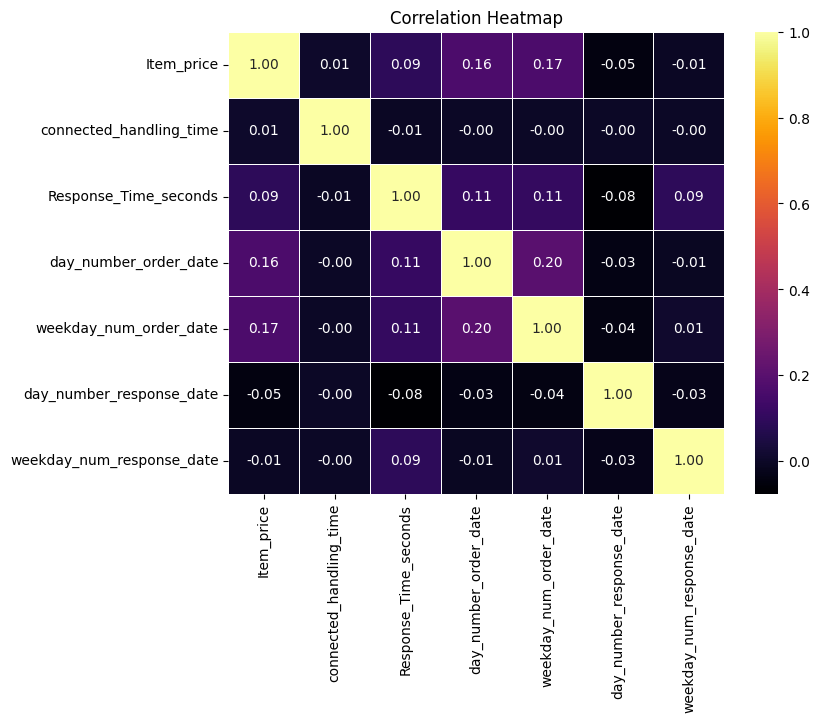

In [70]:
# Correlation Heatmap visualization code
# Drop non-numeric columns
numeric_data = df_removed_var.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)
corr = numeric_data.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)



# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif_data

# Assuming df is your DataFrame containing the features
vif_results = calculate_vif(df)
print(vif_results)

                     Feature        VIF
0                 Item_price   1.329280
1    connected_handling_time  22.090568
2      Response_Time_seconds   1.093413
3      day_number_order_date   6.462011
4     weekday_num_order_date  12.258805
5   day_number_response_date   4.487835
6  weekday_num_response_date   4.913423


In [72]:
# Drop highly correlated feature
df_removed_var.drop(columns=['weekday_num_order_date'], inplace=True)

In [73]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [74]:
# Getting multicolinear columns and dropping them
numeric_data = df_removed_var.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)
highly_correlated_columns=correlation(numeric_data,0.5)

if "CSAT Score" in highly_correlated_columns:
  highly_correlated_columns.remove("CSAT Score")
else:
  pass

df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(85907, 3298)

In [75]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif_data

# Assuming df is your DataFrame containing the features
vif_results = calculate_vif(df)
print(vif_results)

                     Feature        VIF
0                 Item_price   1.306889
1    connected_handling_time  13.904575
2      Response_Time_seconds   1.087071
3      day_number_order_date   6.261296
4   day_number_response_date   4.486682
5  weekday_num_response_date   4.913003


In [76]:
df_removed.shape

(85907, 3298)

In [77]:
print(df_removed.isnull().sum())

Customer Remarks             0
Item_price                   0
connected_handling_time      0
CSAT Score                   0
Manager_Emily Chen           0
                            ..
Customer_City_ZUARINAGAR     0
Response_Time_seconds        0
day_number_order_date        0
day_number_response_date     0
weekday_num_response_date    0
Length: 3298, dtype: int64


##### What all feature selection methods have you used  and why?

To improve model performance and reduce redundancy, I applied a series of feature selection techniques aimed at removing irrelevant or highly correlated features.

Step 1: Dropping Constant Features:

I began by removing features with zero or near-zero variance, as they contribute little to no value in prediction and can introduce noise.

Step 2: Pearson Correlation Analysis:

Using Pearson correlation, I identified features with strong linear relationships. Variables with high absolute correlation (close to ±1) were flagged for potential multicollinearity. Since Pearson correlation is suitable for continuous, metric variables, it was ideal for this stage.

Step 3: Variance Inflation Factor (VIF) Validation:

To further assess multicollinearity, I computed the Variance Inflation Factor (VIF) for each remaining feature. Features with VIF values exceeding 8 were iteratively removed, as they indicated a high degree of collinearity with other variables. The VIF formula used is:

VIF=\frac{1}{1-R^2}

where R² is obtained by regressing a feature against all others.

Outcome:

Through this combined approach, the number of features was successfully reduced from 77 to 10, ensuring a more robust, interpretable, and efficient model with minimized multicollinearity.

### 5. Data Transformation

In [78]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['connected_handling_time', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - ['Item_price', 'Response_Time_seconds', 'day_number_order_date', 'day_number_response_date']


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

During the analysis, I identified two features that exhibited non-symmetric distributions, indicating they do not follow a Gaussian (normal) distribution. The remaining features displayed relatively symmetric curves, making them suitable for standard modeling without transformation.

To address the skewness in the non-Gaussian features, I applied an Exponential Transformation with a power of 0.25. After testing multiple transformation techniques, the exponential approach produced no infinite values and effectively normalized the distributions. As a result, I proceeded with this transformation method to improve data normality and model performance.

**First Transformation**

In [79]:
# Transform Your data
# Transform Your data
# Exponential Transforming the required column
df_removed['Item_price']=np.sqrt(df_removed['Item_price'])
df_removed['Response_Time_seconds']=np.sqrt(df_removed['Response_Time_seconds'])
df_removed['day_number_order_date']=(df_removed['day_number_order_date'])**0.25
df_removed['day_number_response_date']=(df_removed['day_number_response_date'])**0.25

In [80]:
print(df_removed.isnull().sum())

Customer Remarks                0
Item_price                      0
connected_handling_time         0
CSAT Score                      0
Manager_Emily Chen              0
                             ... 
Customer_City_ZUARINAGAR        0
Response_Time_seconds        3128
day_number_order_date           0
day_number_response_date        0
weekday_num_response_date       0
Length: 3298, dtype: int64


In [81]:
#Fill NaN values with the median of Response_Time_seconds columns
df_removed['Response_Time_seconds'] = df_removed['Response_Time_seconds'].fillna(df_removed['Response_Time_seconds'].median())

In [82]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['connected_handling_time', 'day_number_order_date', 'day_number_response_date', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - ['Item_price', 'Response_Time_seconds']


**Second Transformation**

In [83]:
df_removed['Response_Time_seconds'] = np.sqrt(df_removed['Response_Time_seconds'])
df_removed['Item_price'] = (df_removed['Item_price'])**0.25

In [84]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Item_price', 'connected_handling_time', 'day_number_order_date', 'day_number_response_date', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - ['Response_Time_seconds']


**Third Transformation**

In [85]:
# Perform sqrt transform on 'Response_Time_seconds' column
df_removed['Response_Time_seconds'] = np.sqrt(df_removed['Response_Time_seconds'])

In [86]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

In [87]:
# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Item_price', 'connected_handling_time', 'Response_Time_seconds', 'day_number_order_date', 'day_number_response_date', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - []


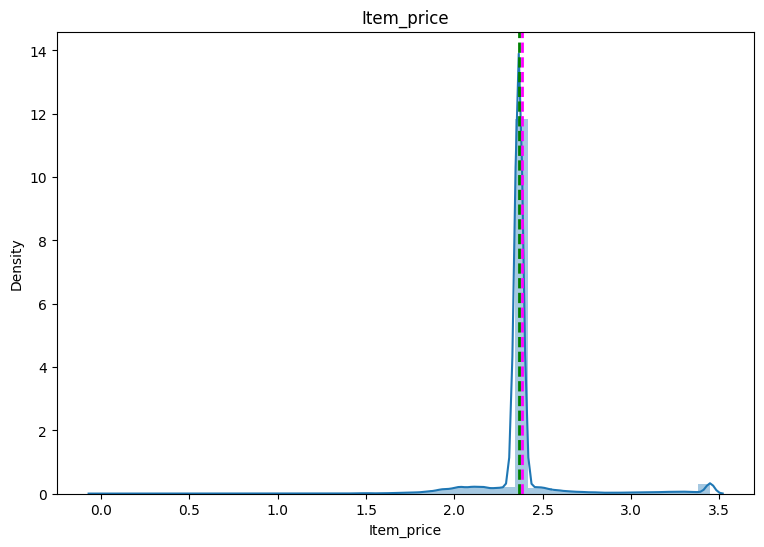

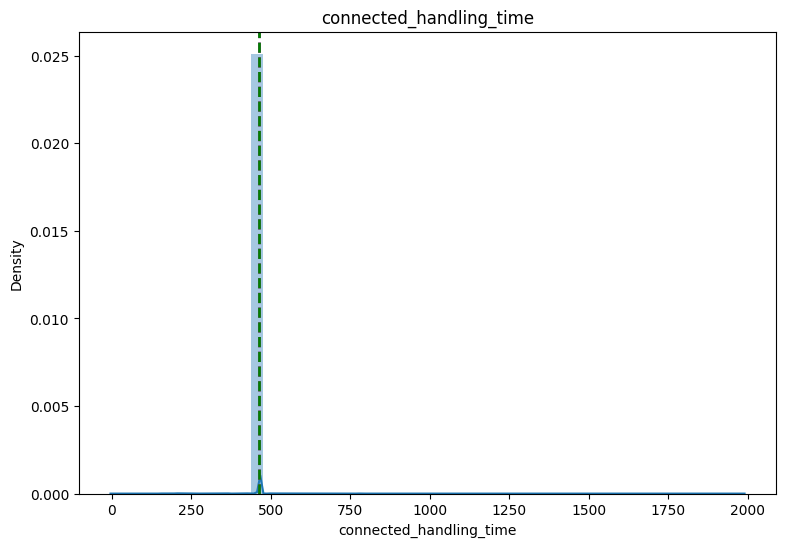

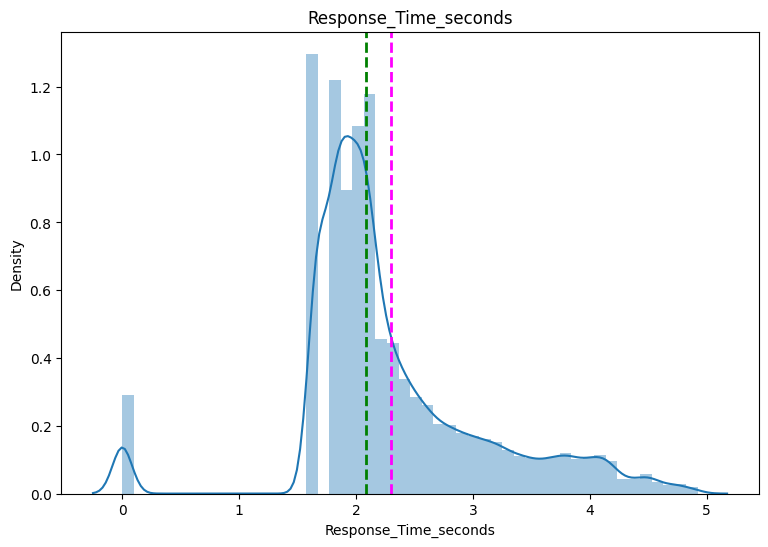

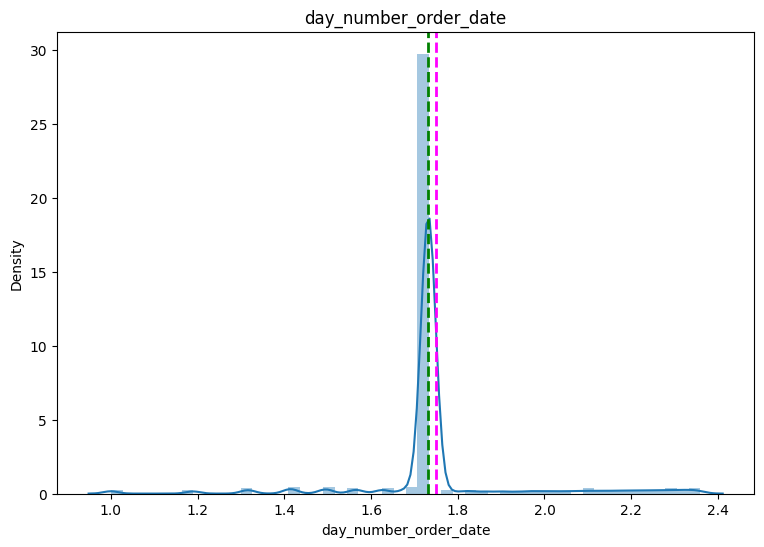

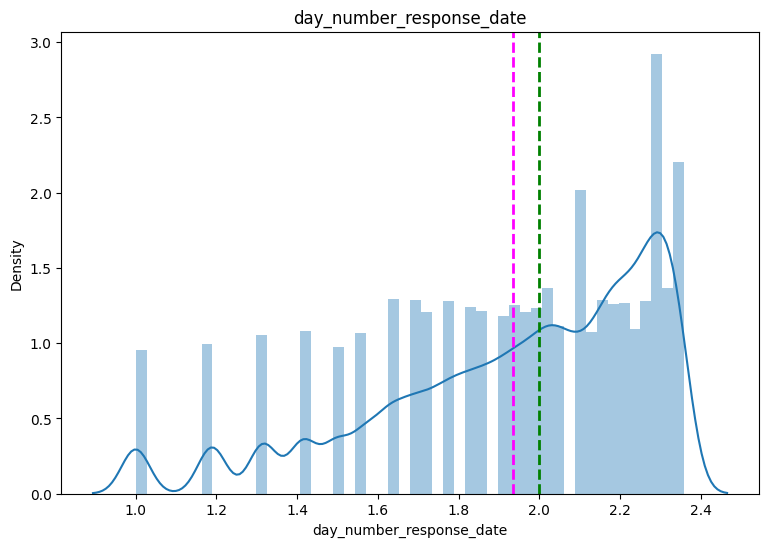

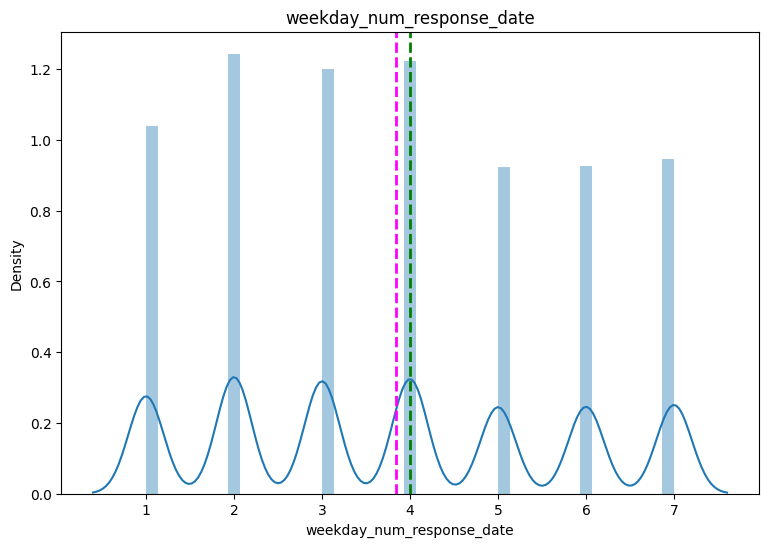

In [88]:
# Visualizing Code
for col in df_removed.loc[:,symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### 6. Data Scaling

In [89]:
# Scaling your data
# Checking the data
df_removed.head()

,Customer Remarks,Item_price,connected_handling_time,CSAT Score,Manager_Emily Chen,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,...,Customer_City_Yeola,Customer_City_ZAHEERABAD,Customer_City_ZAMANIA,Customer_City_ZIRA,Customer_City_ZIRAKPUR,Customer_City_ZUARINAGAR,Response_Time_seconds,day_number_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,2.365091,462.400826,5,False,True,False,False,False,False,...,False,False,False,False,False,False,2.592410,1.732051,1.0,2
1,Missing Reviews,2.365091,462.400826,5,False,False,False,True,False,False,...,False,False,False,False,False,False,1.819272,1.732051,1.0,2
2,Missing Reviews,2.365091,462.400826,5,False,False,False,False,False,True,...,False,False,False,False,False,False,2.455114,1.732051,1.0,2
3,Missing Reviews,2.365091,462.400826,5,False,False,True,False,False,False,...,False,False,False,False,False,False,2.426038,1.732051,1.0,2
4,Missing Reviews,2.365091,462.400826,5,False,False,False,True,False,False,...,False,False,False,False,False,False,1.819272,1.732051,1.0,2


In [90]:
final_df=df_removed.copy()

In [91]:
y=df_removed['CSAT Score']

In [92]:
df_removed.drop(columns=['CSAT Score'],inplace=True)

In [93]:
df_removed.head()

,Customer Remarks,Item_price,connected_handling_time,Manager_Emily Chen,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,Supervisor_Abigail Suzuki,...,Customer_City_Yeola,Customer_City_ZAHEERABAD,Customer_City_ZAMANIA,Customer_City_ZIRA,Customer_City_ZIRAKPUR,Customer_City_ZUARINAGAR,Response_Time_seconds,day_number_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,2.365091,462.400826,False,True,False,False,False,False,False,...,False,False,False,False,False,False,2.592410,1.732051,1.0,2
1,Missing Reviews,2.365091,462.400826,False,False,False,True,False,False,False,...,False,False,False,False,False,False,1.819272,1.732051,1.0,2
2,Missing Reviews,2.365091,462.400826,False,False,False,False,False,True,False,...,False,False,False,False,False,False,2.455114,1.732051,1.0,2
3,Missing Reviews,2.365091,462.400826,False,False,True,False,False,False,False,...,False,False,False,False,False,False,2.426038,1.732051,1.0,2
4,Missing Reviews,2.365091,462.400826,False,False,False,True,False,False,False,...,False,False,False,False,False,False,1.819272,1.732051,1.0,2


In [94]:
import joblib
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns from df_removed
numerical_columns = df_removed.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_removed[numerical_columns] = scaler.fit_transform(df_removed[numerical_columns])

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

# Display the scaled DataFrame
df_removed.head()

,Customer Remarks,Item_price,connected_handling_time,Manager_Emily Chen,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,Supervisor_Abigail Suzuki,...,Customer_City_Yeola,Customer_City_ZAHEERABAD,Customer_City_ZAMANIA,Customer_City_ZIRA,Customer_City_ZIRAKPUR,Customer_City_ZUARINAGAR,Response_Time_seconds,day_number_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,-0.09226,0.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,0.363236,-0.106597,-2.735145,-0.94492
1,Missing Reviews,-0.09226,0.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-0.590667,-0.106597,-2.735145,-0.94492
2,Missing Reviews,-0.09226,0.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,0.193840,-0.106597,-2.735145,-0.94492
3,Missing Reviews,-0.09226,0.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,0.157965,-0.106597,-2.735145,-0.94492
4,Missing Reviews,-0.09226,0.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,-0.590667,-0.106597,-2.735145,-0.94492


In [95]:
numerical_columns

Index(['Item_price', 'connected_handling_time', 'Response_Time_seconds',
       'day_number_order_date', 'day_number_response_date',
       'weekday_num_response_date'],
      dtype='object')

In [96]:
# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [97]:
print(df_removed.isnull().sum())

Customer Remarks             0
Item_price                   0
connected_handling_time      0
Manager_Emily Chen           0
Manager_Jennifer Nguyen      0
                            ..
Customer_City_ZUARINAGAR     0
Response_Time_seconds        0
day_number_order_date        0
day_number_response_date     0
weekday_num_response_date    0
Length: 3297, dtype: int64


In [98]:
print(df_removed.shape)  # Should be (85907, 3296), NOT (85907, 3297)
print(df_removed.columns)  # Check if there's an extra unexpected column

(85907, 3297)
Index(['Customer Remarks', 'Item_price', 'connected_handling_time',
       'Manager_Emily Chen', 'Manager_Jennifer Nguyen', 'Manager_John Smith',
       'Manager_Michael Lee', 'Manager_Olivia Tan', 'Manager_William Kim',
       'Supervisor_Abigail Suzuki',
       ...
       'Customer_City_Yeola', 'Customer_City_ZAHEERABAD',
       'Customer_City_ZAMANIA', 'Customer_City_ZIRA', 'Customer_City_ZIRAKPUR',
       'Customer_City_ZUARINAGAR', 'Response_Time_seconds',
       'day_number_order_date', 'day_number_response_date',
       'weekday_num_response_date'],
      dtype='object', length=3297)


In [99]:
print(df_removed.select_dtypes(include=['object']).columns)

Index(['Customer Remarks'], dtype='object')


In [100]:
df_removed = df_removed.drop(columns=['Customer Remarks'])  # Replace 'ColumnName' with the actual name

In [101]:
print(df_removed.shape)  # Should be (85907, 3296), NOT (85907, 3297)
print(df_removed.columns)  # Check if there's an extra unexpected column

(85907, 3296)
Index(['Item_price', 'connected_handling_time', 'Manager_Emily Chen',
       'Manager_Jennifer Nguyen', 'Manager_John Smith', 'Manager_Michael Lee',
       'Manager_Olivia Tan', 'Manager_William Kim',
       'Supervisor_Abigail Suzuki', 'Supervisor_Aiden Patel',
       ...
       'Customer_City_Yeola', 'Customer_City_ZAHEERABAD',
       'Customer_City_ZAMANIA', 'Customer_City_ZIRA', 'Customer_City_ZIRAKPUR',
       'Customer_City_ZUARINAGAR', 'Response_Time_seconds',
       'day_number_order_date', 'day_number_response_date',
       'weekday_num_response_date'],
      dtype='object', length=3296)


##### Which method have you used to scale you data and why?

When using machine learning algorithms that are sensitive to feature scales (such as neural networks or distance-based models), it's essential to apply feature scaling—especially when feature ranges vary significantly.

If one feature ranges from -2 to 2 and another from -100 to 100, the model may become biased toward the feature with the larger scale. In such cases, scaling ensures that all features contribute equally to the learning process.

The choice between normalization and standardization depends on the data distribution:

* Use normalization (e.g., MinMaxScaler) when the data does not follow a Gaussian distribution.

* Use standardization (e.g., StandardScaler) when the data follows a Gaussian distribution, as it transforms features to have a mean of 0 and standard deviation of 1.

Since my dataset shows large differences in feature ranges and follows an approximately Gaussian distribution, I applied standardization using StandardScaler to ensure optimal model performance.

### 7. Data Splitting

In [102]:
#One Hot Encoding of Target Variable

from sklearn.preprocessing import OneHotEncoder

# Extract the target variable
y = final_df['CSAT Score'].values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the target variable
y_one_hot = encoder.fit_transform(y)

# Convert to pandas DataFrame
y_one_hot_df = pd.DataFrame(y_one_hot, columns=[f'class_{int(i)}' for i in range(y_one_hot.shape[1])])

In [103]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting into 70:30 ratio.

X_train, X_test, y_train, y_test = train_test_split(df_removed,y_one_hot_df, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (60134, 3296)
Number transactions y_train dataset:  (60134, 5)
Number transactions X_test dataset:  (25773, 3296)
Number transactions y_test dataset:  (25773, 5)


In [104]:
features_list=X_train.columns.to_list()
import joblib
# Save the fitted scaler
joblib.dump(features_list, "features.pkl")

['features.pkl']

##### What data splitting ratio have you used and why?

When splitting data for training and testing, there is a trade-off between the variance of parameter estimates (which increases with less training data) and the variance of performance metrics (which increases with less testing data). The goal is to choose a split that provides enough data in both sets to ensure reliable model training and evaluation.

While the 80:20 split is commonly used and aligns with the Pareto principle, the optimal ratio depends on the size of the dataset. With larger datasets, the specific ratio is less critical. However, when the dataset is relatively small, careful balancing becomes more important.

In this case, since the training dataset is limited, I used a 70:30 train-test split to retain more data for model evaluation while still allowing enough data for effective training. This helps manage the variance in both parameter estimation and model validation.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

An imbalanced dataset is a common concern in supervised machine learning, particularly in classification problems where one class significantly outnumbers the others.

Imbalance occurs when the distribution of data points across classes is uneven. While minor imbalances (e.g., 60:40) typically do not affect model performance significantly, severe imbalances (e.g., 90:10 or 85:15) can lead to biased models that favor the majority class, often at the expense of minority class accuracy.

In our case, the dependent variable shows a class ratio of approximately 85:15, indicating a high imbalance. If left unaddressed, this can lead the model to over-predict the majority class, reducing its ability to learn meaningful patterns from the minority class.

Therefore, it is crucial to apply data balancing techniques (such as oversampling, undersampling, or synthetic data generation) before model training to ensure fair and reliable predictions across all classes.

class_0  class_1  class_2  class_3  class_4
0.0      0.0      0.0      0.0      1.0        41806
1.0      0.0      0.0      0.0      0.0         7840
0.0      0.0      0.0      1.0      0.0         7810
                  1.0      0.0      0.0         1801
         1.0      0.0      0.0      0.0          877
Name: count, dtype: int64
 


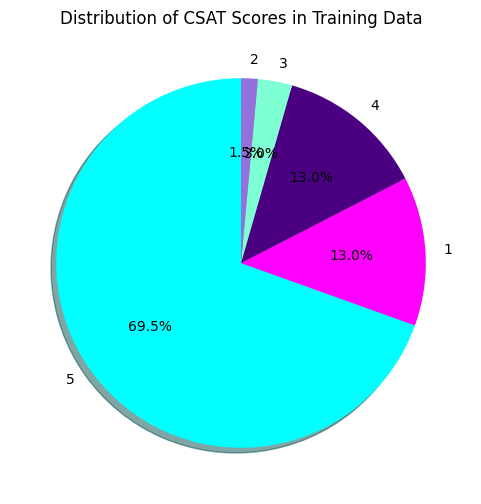

In [105]:
# Handling Imbalanced Dataset (If needed)
# Dependent Column Value Counts
print(y_train.value_counts())
print(" ")

cool_colors = [
    '#00FFFF',
    '#FF00FF',
    '#4B0082',
    '#7FFFD4',
    '#9370DB'
]

# Plot pie chart
y_train.value_counts().plot(
    kind='pie',
    figsize=(15, 6),
    labels=['5', '1', '4', '3', '2'],
    colors=cool_colors,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)

plt.ylabel('')
plt.title('Distribution of CSAT Scores in Training Data')
plt.show()

In [ ]:
# Handling Imbalance in the Target Variable using S.M.O.T.E

# Convert the one-hot encoded DataFrame back to a Series of original class labels to apply SMOTE
y_series = y_train.idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
sm = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_series)

# Describe info about train and test set
print("Number of transactions in X_train dataset: ", X_train_resampled.shape)
print("Number of transactions in y_train dataset: ", y_train_resampled.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

In [ ]:
#Converting the target variable train data shape that of test data shape

# Extract the target variable
y = y_train_resampled.values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the target variable
y_one_hot = encoder.fit_transform(y)

# Convert y_train_resampled_one_hot back to DataFrame for consistency
y_train_resampled_df = pd.DataFrame(y_one_hot, columns=[f'class_{int(i)}' for i in range(y_one_hot.shape[1])])

In [ ]:
# Visualization Code
# Dependant Column Value Counts
print(y_train_resampled_df.value_counts())
print(" ")

# Define cool, unique color palette
cool_colors = [
    '#00FFFF',  # Cyan
    '#FF00FF',  # Magenta
    '#4B0082',  # Indigo
    '#7FFFD4',  # Aquamarine
    '#9370DB'   # Medium Purple
]

# Dependent Variable Column Visualization
y_train_resampled_df.value_counts().plot(
    kind='pie',
    figsize=(15, 6),
    labels=['1', '2', '3', '4', '5'],
    colors=cool_colors,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)

plt.ylabel('')  # Hide y-axis label
plt.title('Distribution of CSAT Scores in Resampled Training Data')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To address the 85:15 class imbalance in the dataset, I applied SMOTE (Synthetic Minority Over-sampling Technique)—a widely used method for balancing imbalanced classification problems.

SMOTE works by generating synthetic data points for the minority class through interpolation, rather than duplicating existing instances. This approach helps enrich the feature space of the minority class without introducing redundancy, making it more effective than simple oversampling.

Since many machine learning algorithms are sensitive to class imbalance, using SMOTE enhances the model’s ability to learn from both classes fairly, leading to improved generalization and predictive performance.

Given these benefits, SMOTE was the preferred technique for balancing the dataset prior to model training.

In [ ]:
# Describe info about train and test set
print("Number of transactions in X_train dataset: ", X_train_resampled.shape)
print("Number of transactions in y_train dataset: ", y_train_resampled_df.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

## ***7. DL Model Implementation***

### DL Model: Deep Learning ANN Classification Model

#### Install Required Libraries

#### Import Libraries

#### Ensuring the target labels in the correct format.

#### Define the ANN Model

#### Define and Initialize the Keras Classifier model

#### Initialize StratifiedKFold Cross Validation (no. of folds=3)

#### Performing 3-fold cross validation and training the ANN deep learning model

#### ROC AUC Curve

#### Confusion Matrix

#### Classification Report

#### Training and Validation Accuracy Plot

# **Conclusion**

This project successfully developed a deep learning-based classification model to predict Customer Satisfaction (CSAT) scores using customer interaction data from the e-commerce industry. Through detailed exploratory analysis and statistical testing, we identified key factors influencing CSAT scores—such as response time, product category, agent experience, item price, and service shift timings.

The data underwent comprehensive preprocessing, including handling missing values, transforming non-Gaussian features, removing multicollinearity, and scaling. One-hot encoding was applied to categorical features, and class imbalance was addressed using SMOTE to improve model learning.

A neural network classifier was built using the Keras framework, achieving an accuracy of approximately 85%, demonstrating its effectiveness in classifying multi-class CSAT scores. Hypothesis testing reinforced that faster response times significantly contribute to higher satisfaction, while higher item prices did not consistently lead to lower scores, offering valuable input for strategic decision-making.

Overall, the project provides a scalable, data-driven approach to proactively monitor and enhance customer satisfaction. By leveraging these insights, e-commerce businesses can optimize service operations, personalize customer interactions, and strengthen long-term customer loyalty.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***